# Dataset
Credit Card Customer Dataset   
Dataset can be found in: https://www.kaggle.com/sakshigoyal7/credit-card-customers

# What is inside the dataset? 

* **CLIENTNUM:** Client number. Unique identifier for the customer holding the account
* **Attrition_Flag:** Internal event (customer activity) variable - if the account is closed then 1 else 0
* **Customer_Age:** Demographic variable - Customer's Age in Years
* **Gender:** Demographic variable - M=Male, F=Female
* **Dependent_count:** Demographic variable - Number of dependents
* **Education_Level:** Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
* **Marital_Status:** Demographic variable - Married, Single, Divorced, Unknown
* **Income_Category:** Demographic variable - Annual Income Category of the account holder (<40K, 40K-60K, 60K-80K, 80K-120K, >120K)

* **Card_Category:** Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
* **Months_on_book:** Period of relationship with bank
* **Total_Relationship_Count:** Total no. of products held by the customer
* **Months_Inactive_12_mon:** No. of months inactive in the last 12 months
* **Contacts_Count_12_mon:** No. of Contacts in the last 12 months
* **Credit_Limit:** Credit Limit on the Credit Card
* **Total_Revolving_Bal:** Total Revolving Balance on the Credit Card
* **Avg_Open_To_Buy:** Open to Buy Credit Line (Average of last 12 months)
* **Total_Amt_Chng_Q4_Q1:** Change in Transaction Amount (Q4 over Q1)
* **Total_Trans_Amt:** Total Transaction Amount (Last 12 months)
* **Total_Trans_Ct:** Total Transaction Count (Last 12 months)
* **Total_Ct_Chng_Q4_Q1:** Change in Transaction Count (Q4 over Q1)
* **Avg_Utilization_Ratio:** Average Card Utilization Ratio

## Problem Statement

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

## Essential Libraries

Let us begin by importing the essential Python Libraries.

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd

#Data Visualisation
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Machine Learning
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# LinearRegression
from sklearn.linear_model import LinearRegression

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

# Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

## Import Dataset

In [ ]:
o_data = pd.read_csv("BankChurners.csv", header=0)
data = o_data.copy().iloc[:,0:-2]
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [ ]:
print("Data type : ", type(data))
print("Data dims : ", data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (10127, 21)


Check the variables (and their types) in the dataset using the `dtypes` attribute.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

It would seem that there are `10127` rows and `21` columns. 
It seems that **none of the columns have NULL values**. 

### Exploratory Data Analysis

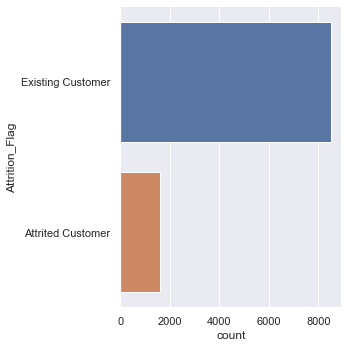

In [ ]:
sb.catplot(y = "Attrition_Flag", data = data, kind = "count")

In [ ]:
countG, countB = data['Attrition_Flag'].value_counts()
print("Ratio of classes is Existing Customer : Attrited Customer = ", countG, ":", countB)

Ratio of classes is Existing Customer : Attrited Customer =  8500 : 1627


In [ ]:
# Numeric Predictors
data[['CLIENTNUM','Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']].describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
# Categorical Predictors
data[['Education_Level','Marital_Status','Gender','Income_Category','Card_Category']].describe()

,Education_Level,Marital_Status,Gender,Income_Category,Card_Category
count,10127,10127,10127,10127,10127
unique,7,4,2,6,4
top,Graduate,Married,F,Less than $40K,Blue
freq,3128,4687,5358,3561,9436


### Predictors corresponding to the credit

<AxesSubplot:xlabel='CLIENTNUM', ylabel='Count'>

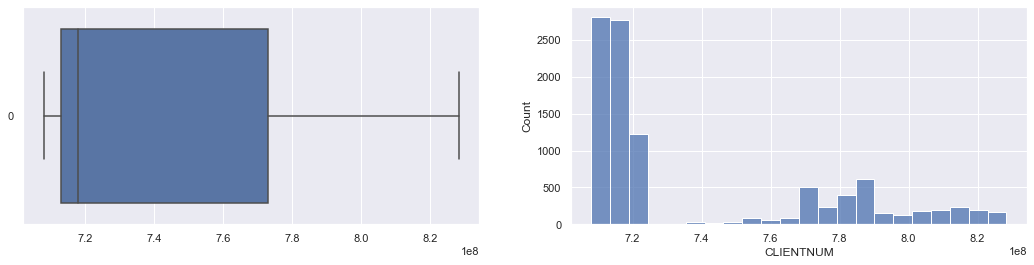

In [ ]:
#CLIENTNUM
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = data['CLIENTNUM'], orient = "h", ax = axes[0])
sb.histplot(data = data['CLIENTNUM'], ax = axes[1])

<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

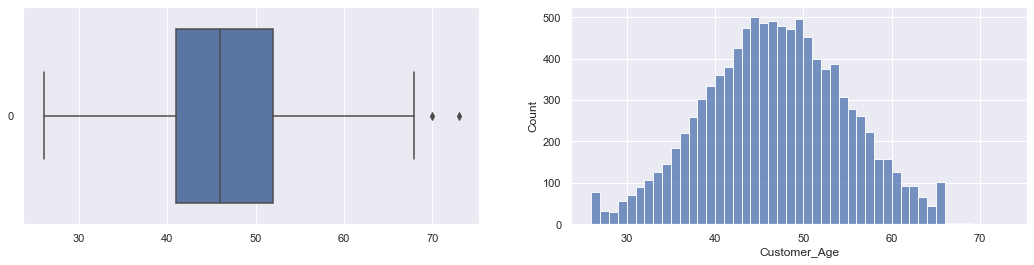

In [ ]:
#Customer_Age
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = data['Customer_Age'], orient = "h", ax = axes[0])
sb.histplot(data = data['Customer_Age'], ax = axes[1])

<AxesSubplot:xlabel='Dependent_count', ylabel='Count'>

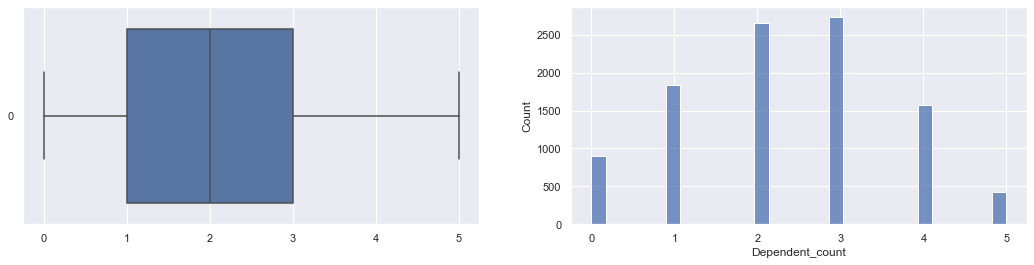

In [ ]:
#Dependent_count
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = data['Dependent_count'], orient = "h", ax = axes[0])
sb.histplot(data = data['Dependent_count'], ax = axes[1])

<AxesSubplot:xlabel='Months_on_book', ylabel='Count'>

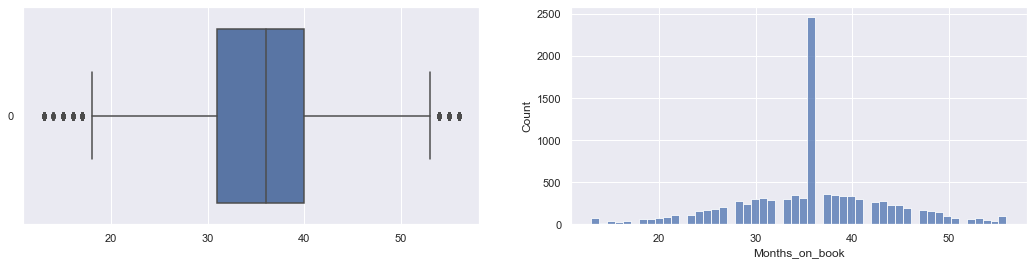

In [ ]:
#Months_on_book
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = data['Months_on_book'], orient = "h", ax = axes[0])
sb.histplot(data = data['Months_on_book'], ax = axes[1])

<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='Count'>

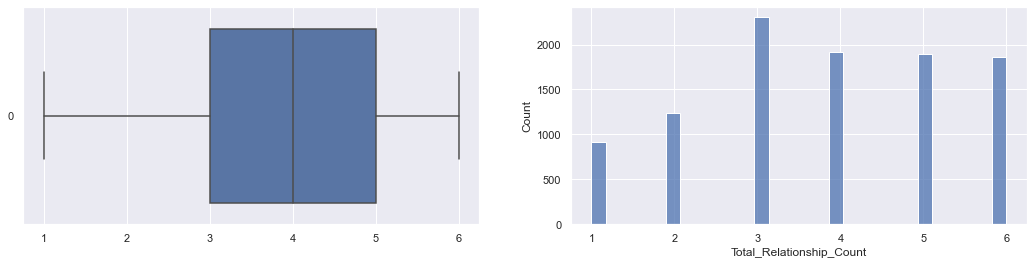

In [ ]:
#Total_Relationship_Count
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = data['Total_Relationship_Count'], orient = "h", ax = axes[0])
sb.histplot(data = data['Total_Relationship_Count'], ax = axes[1])

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Count'>

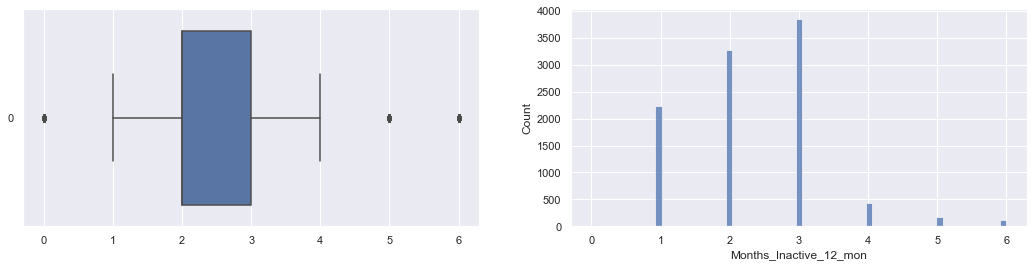

In [ ]:
#Months_Inactive_12_mon
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = data['Months_Inactive_12_mon'], orient = "h", ax = axes[0])
sb.histplot(data = data['Months_Inactive_12_mon'], ax = axes[1])

<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='Count'>

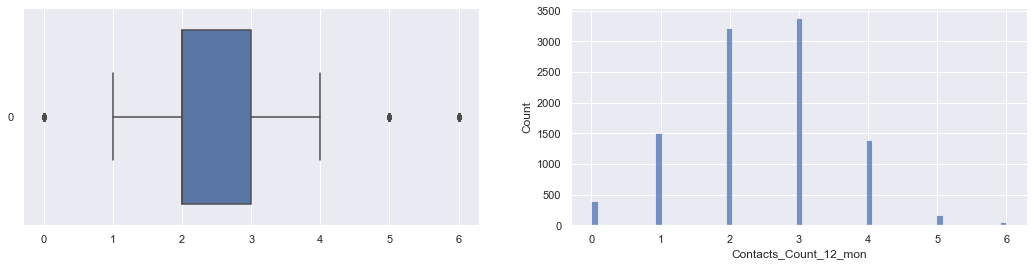

In [ ]:
#Contacts_Count_12_mon
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = data['Contacts_Count_12_mon'], orient = "h", ax = axes[0])
sb.histplot(data = data['Contacts_Count_12_mon'], ax = axes[1])

<AxesSubplot:xlabel='Credit_Limit', ylabel='Count'>

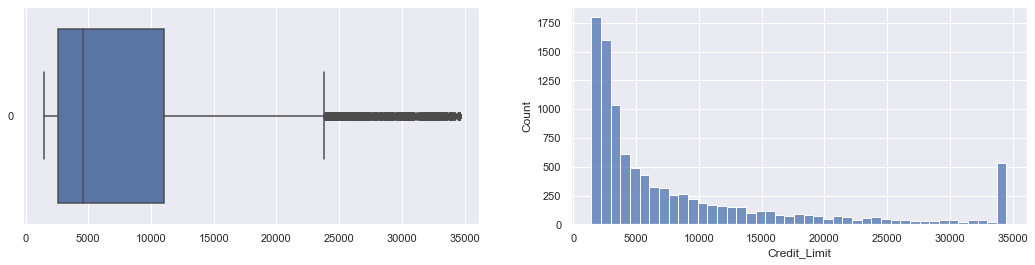

In [ ]:
#Credit_Limit
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = data['Credit_Limit'], orient = "h", ax = axes[0])
sb.histplot(data = data['Credit_Limit'], ax = axes[1])

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Count'>

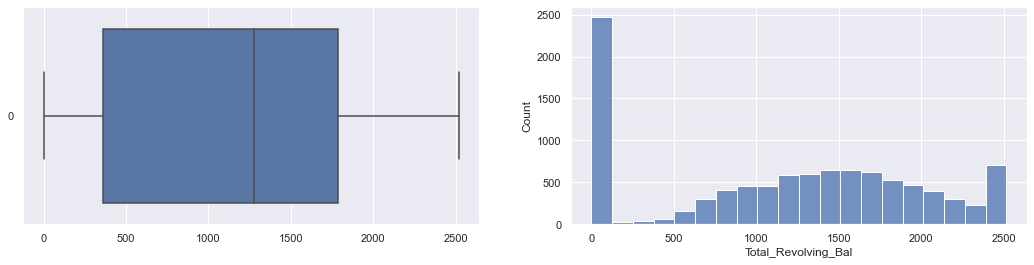

In [ ]:
#Total_Revolving_Bal
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = data['Total_Revolving_Bal'], orient = "h", ax = axes[0])
sb.histplot(data = data['Total_Revolving_Bal'], ax = axes[1])

<AxesSubplot:xlabel='Avg_Open_To_Buy', ylabel='Count'>

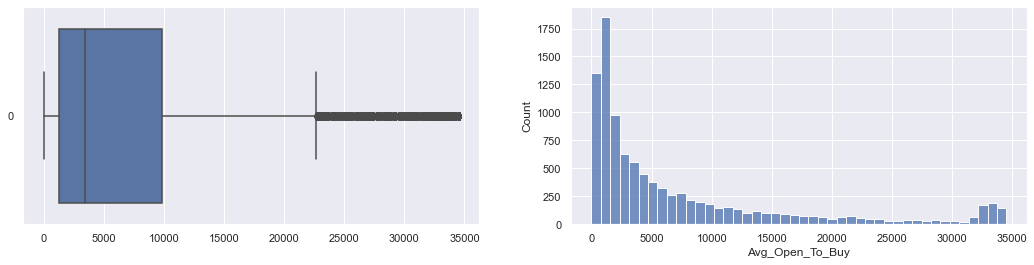

In [ ]:
#Avg_Open_To_Buy
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = data['Avg_Open_To_Buy'], orient = "h", ax = axes[0])
sb.histplot(data = data['Avg_Open_To_Buy'], ax = axes[1])

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Count'>

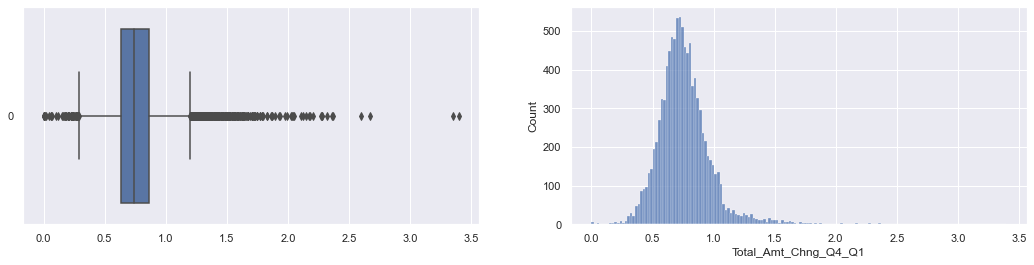

In [ ]:
#Total_Amt_Chng_Q4_Q1
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = data['Total_Amt_Chng_Q4_Q1'], orient = "h", ax = axes[0])
sb.histplot(data = data['Total_Amt_Chng_Q4_Q1'], ax = axes[1])

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Count'>

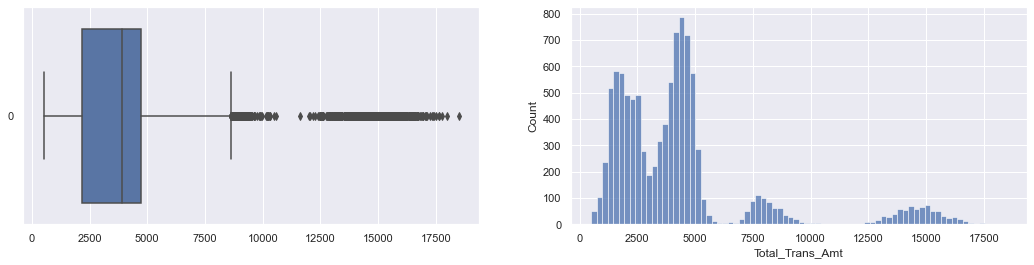

In [ ]:
#Total_Trans_Amt
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = data['Total_Trans_Amt'], orient = "h", ax = axes[0])
sb.histplot(data = data['Total_Trans_Amt'], ax = axes[1])

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Count'>

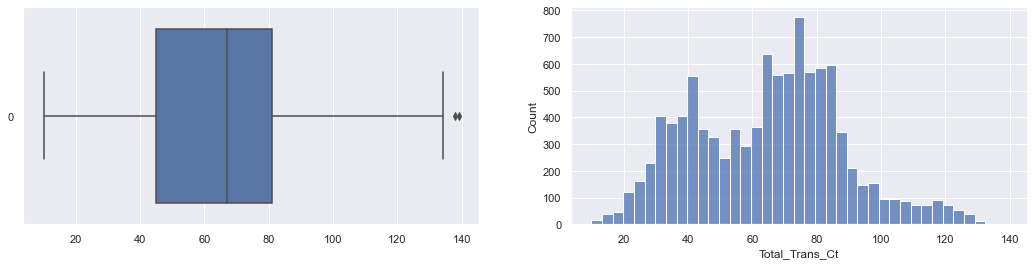

In [ ]:
#Total_Trans_Ct
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = data['Total_Trans_Ct'], orient = "h", ax = axes[0])
sb.histplot(data = data['Total_Trans_Ct'], ax = axes[1])

<AxesSubplot:xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Count'>

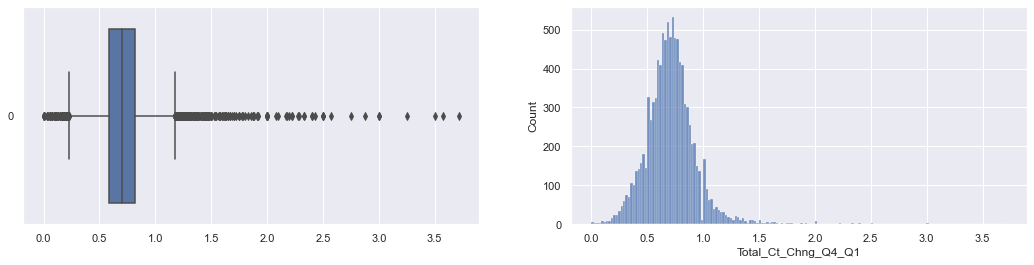

In [ ]:
#Total_Ct_Chng_Q4_Q1
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = data['Total_Ct_Chng_Q4_Q1'], orient = "h", ax = axes[0])
sb.histplot(data = data['Total_Ct_Chng_Q4_Q1'], ax = axes[1])

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Count'>

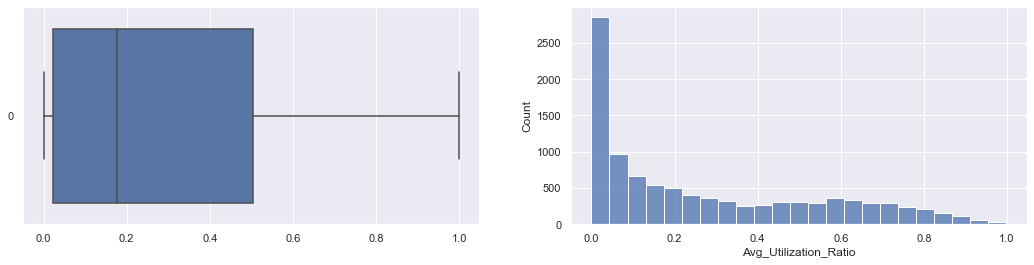

In [ ]:
#Avg_Utilization_Ratio
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = data['Avg_Utilization_Ratio'], orient = "h", ax = axes[0])
sb.histplot(data = data['Avg_Utilization_Ratio'], ax = axes[1])

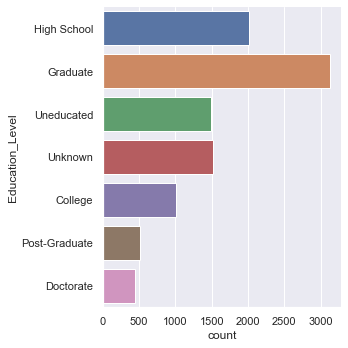

In [ ]:
#Education_Level of customers
sb.catplot(y = 'Education_Level', data = data, kind = "count")

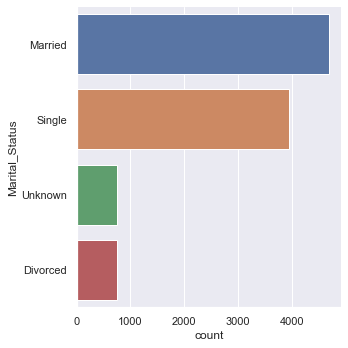

In [ ]:
#Marital_Status of customers
sb.catplot(y = 'Marital_Status', data = data, kind = "count")

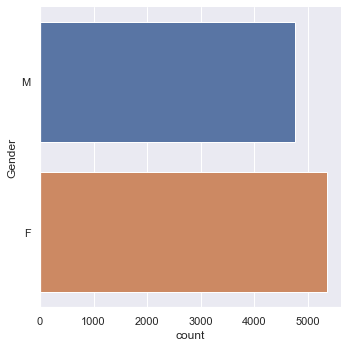

In [ ]:
#Gender of customers
sb.catplot(y = 'Gender', data = data, kind = "count")

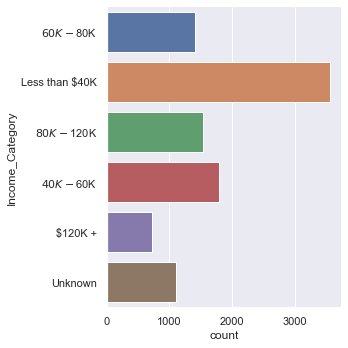

In [ ]:
#Income_Category of customers
sb.catplot(y = 'Income_Category', data = data, kind = "count")

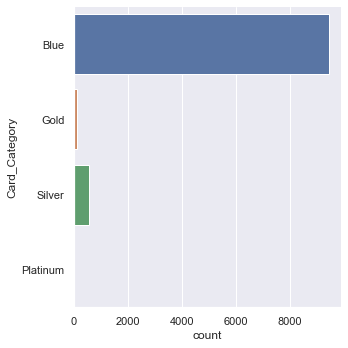

In [ ]:
#Card_Category of customers
sb.catplot(y = 'Card_Category', data = data, kind = "count")

### Relationship with Attrition_Flag

<AxesSubplot:xlabel='CLIENTNUM', ylabel='Attrition_Flag'>

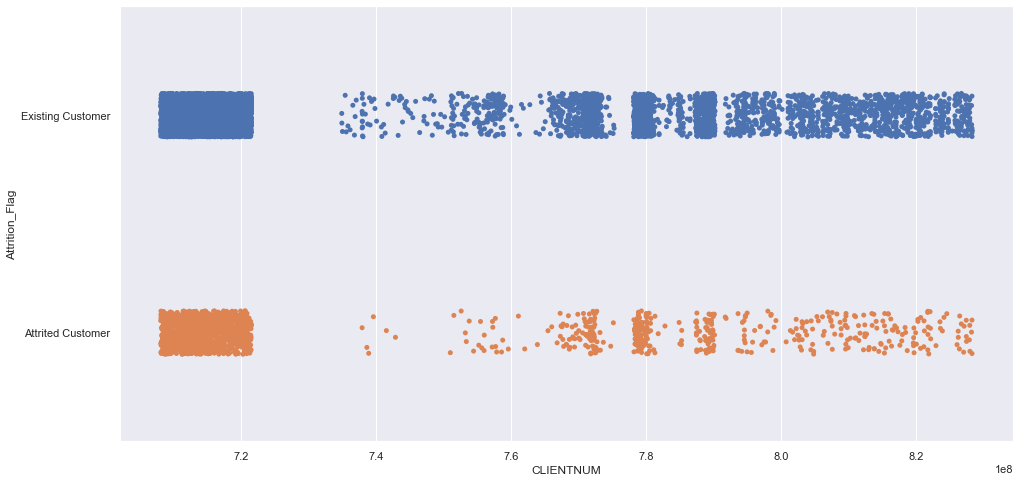

In [ ]:
# Attrition_Flag vs CLIENTNUM
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'CLIENTNUM', y = 'Attrition_Flag', data = data)

<AxesSubplot:xlabel='Customer_Age', ylabel='Attrition_Flag'>

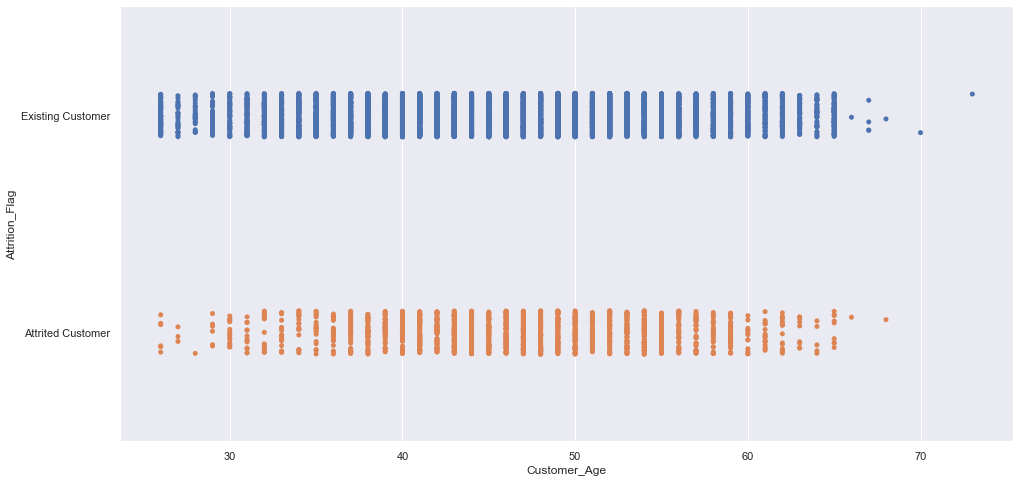

In [ ]:
# Attrition_Flag vs Customer_Age
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Customer_Age',y = 'Attrition_Flag', data = data)

<AxesSubplot:xlabel='Dependent_count', ylabel='Attrition_Flag'>

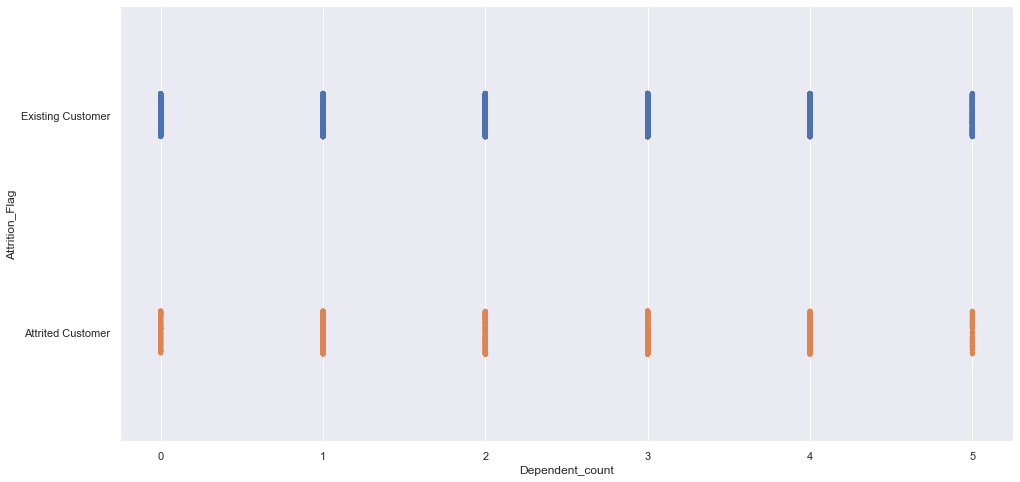

In [ ]:
# Attrition_Flag vs Dependent_count
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Dependent_count', y = 'Attrition_Flag', data = data)

<AxesSubplot:xlabel='Months_on_book', ylabel='Attrition_Flag'>

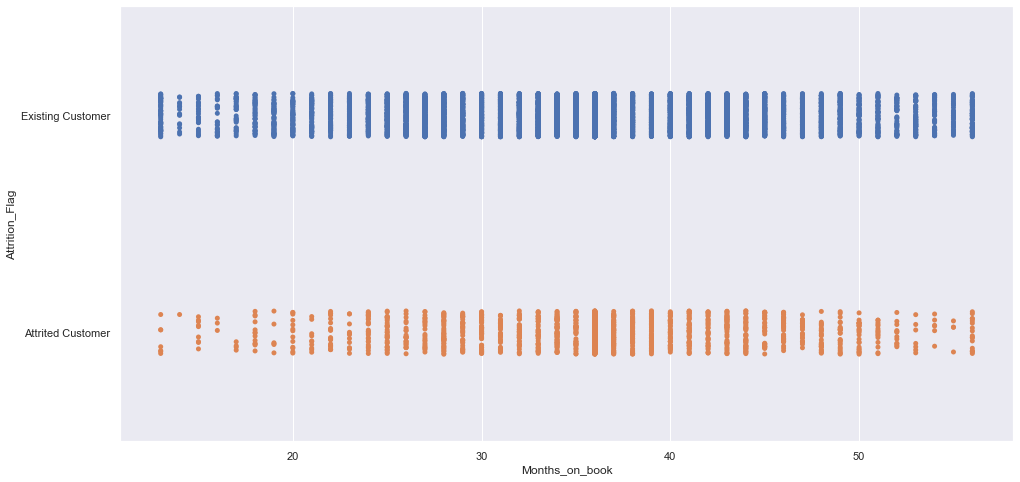

In [ ]:
# Attrition_Flag vs Months_on_book
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Months_on_book', y = 'Attrition_Flag', data = data)

<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='Attrition_Flag'>

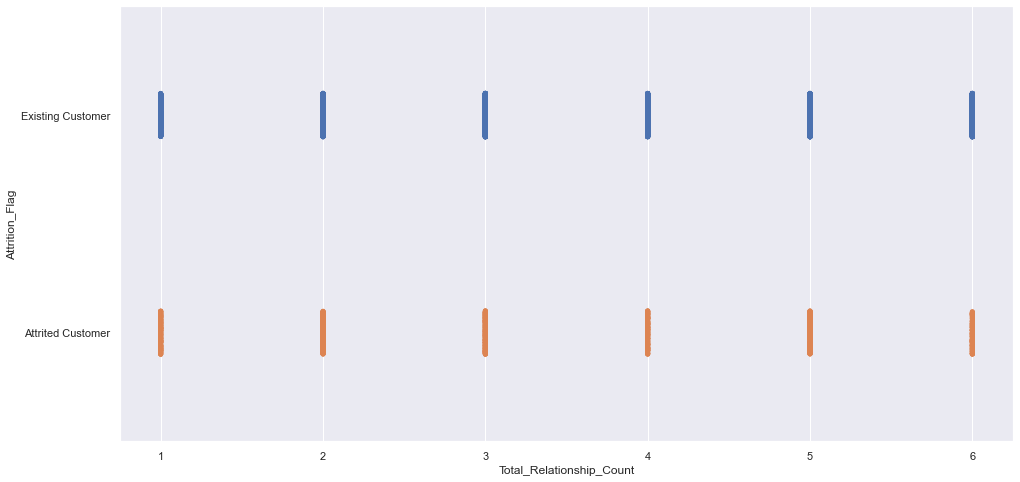

In [ ]:
# Attrition_Flag vs Total_Relationship_Count
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Total_Relationship_Count', y = 'Attrition_Flag', data = data)

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Attrition_Flag'>

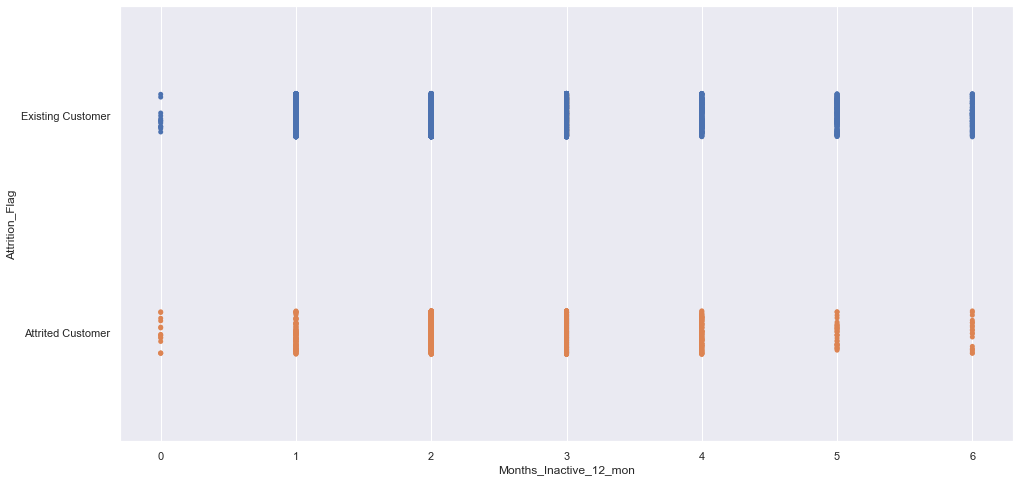

In [ ]:
# Attrition_Flag vs Months_Inactive_12_mon
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Months_Inactive_12_mon', y = 'Attrition_Flag', data = data)

<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='Attrition_Flag'>

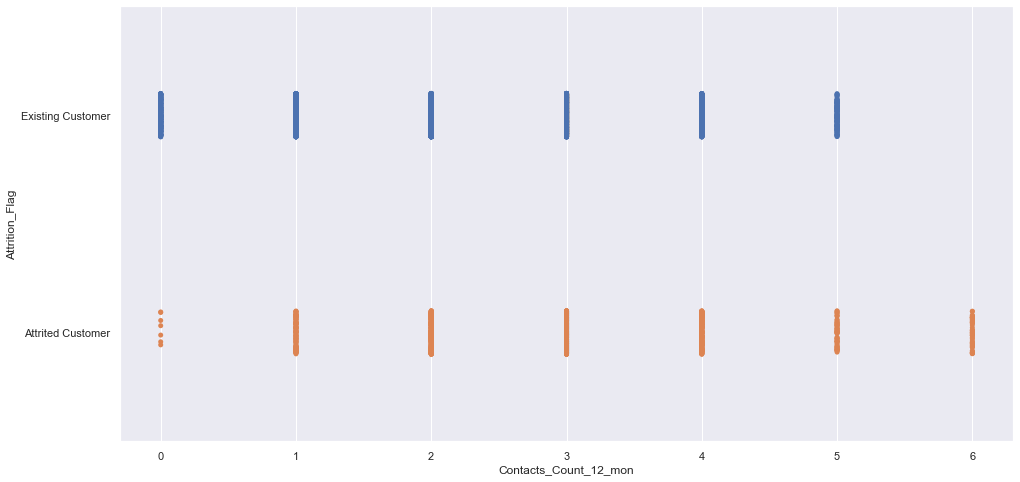

In [ ]:
# Attrition_Flag vs Contacts_Count_12_mon
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Contacts_Count_12_mon', y = 'Attrition_Flag', data = data)

<AxesSubplot:xlabel='Credit_Limit', ylabel='Attrition_Flag'>

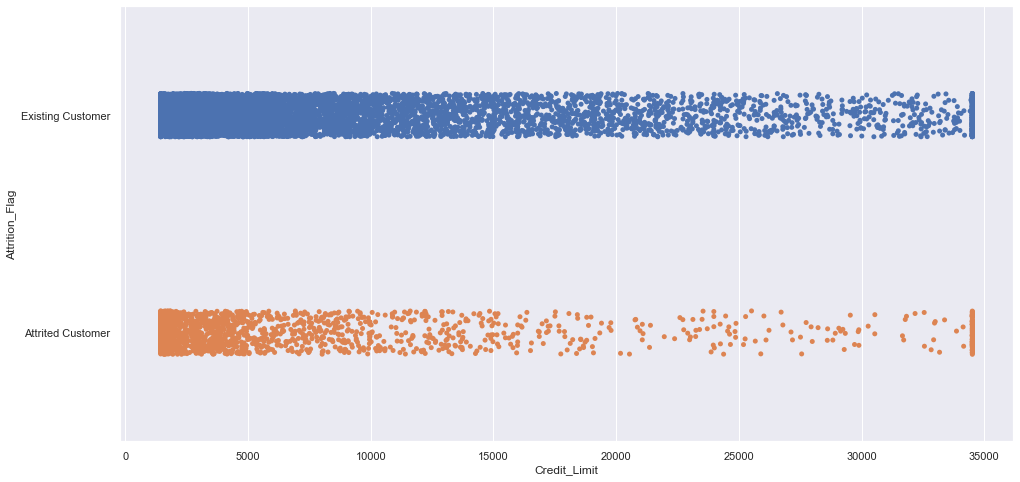

In [ ]:
# Attrition_Flag vs Credit_Limit
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Credit_Limit',y = 'Attrition_Flag', data = data)

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Attrition_Flag'>

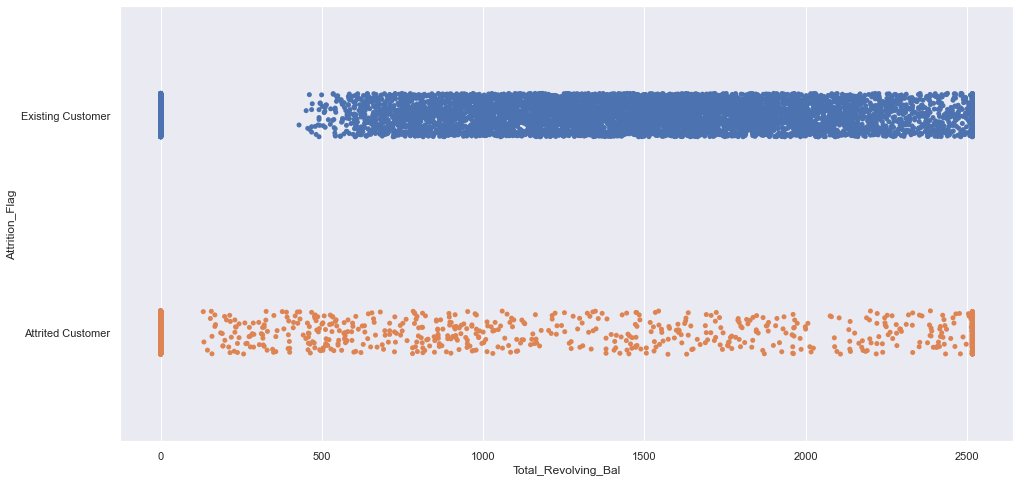

In [ ]:
# Attrition_Flag vs Total_Revolving_Bal
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Total_Revolving_Bal', y = 'Attrition_Flag', data = data)

<AxesSubplot:xlabel='Avg_Open_To_Buy', ylabel='Attrition_Flag'>

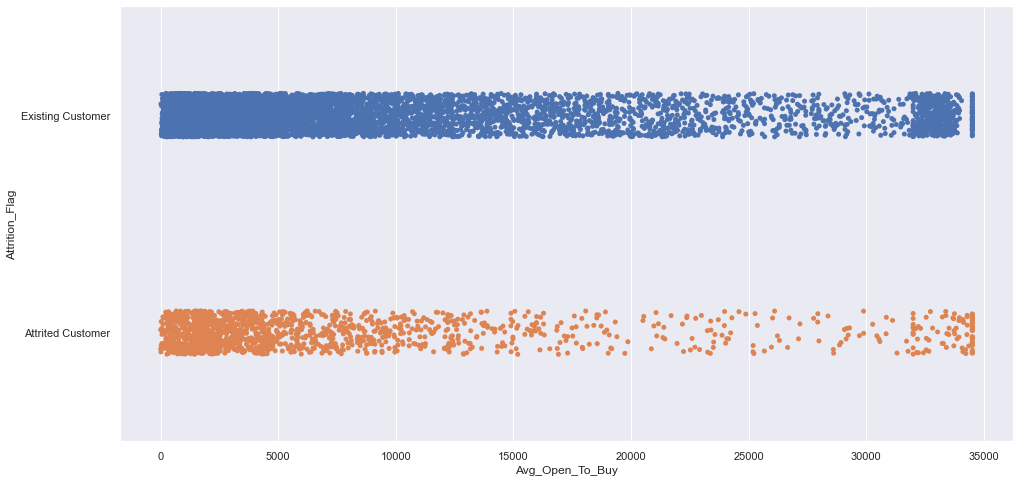

In [ ]:
# Attrition_Flag vs Avg_Open_To_Buy
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Avg_Open_To_Buy', y = 'Attrition_Flag', data = data)

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1', ylabel='Attrition_Flag'>

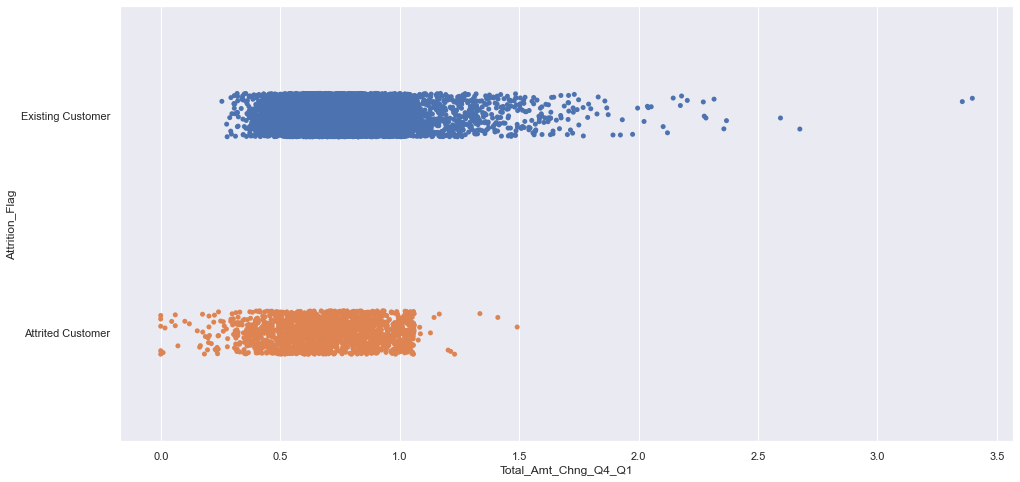

In [ ]:
# Attrition_Flag vs Total_Amt_Chng_Q4_Q1
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Total_Amt_Chng_Q4_Q1', y = 'Attrition_Flag', data = data)

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Attrition_Flag'>

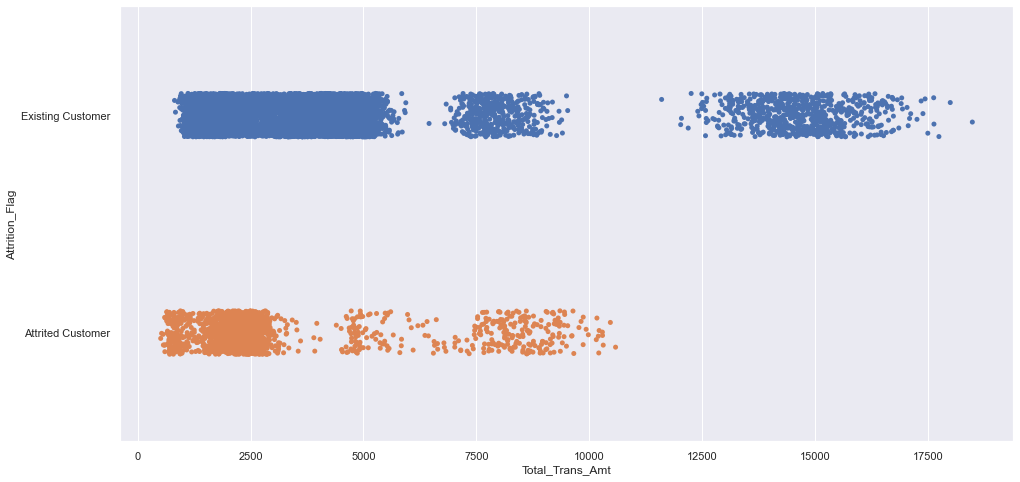

In [ ]:
# Attrition_Flag vs Total_Trans_Amt
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Total_Trans_Amt', y = 'Attrition_Flag', data = data)

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Attrition_Flag'>

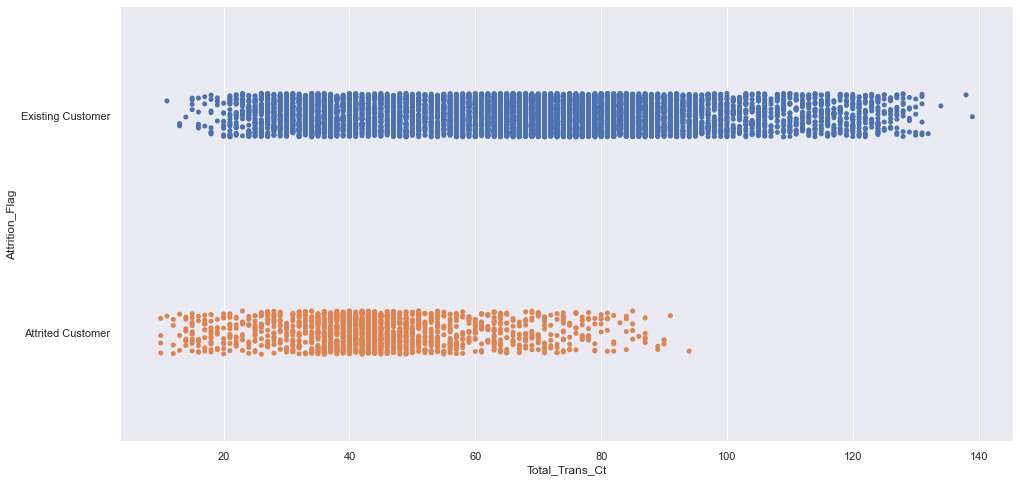

In [ ]:
# Attrition_Flag vs Total_Trans_Ct
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Total_Trans_Ct', y = 'Attrition_Flag', data = data)

<AxesSubplot:xlabel='Total_Ct_Chng_Q4_Q1', ylabel='Attrition_Flag'>

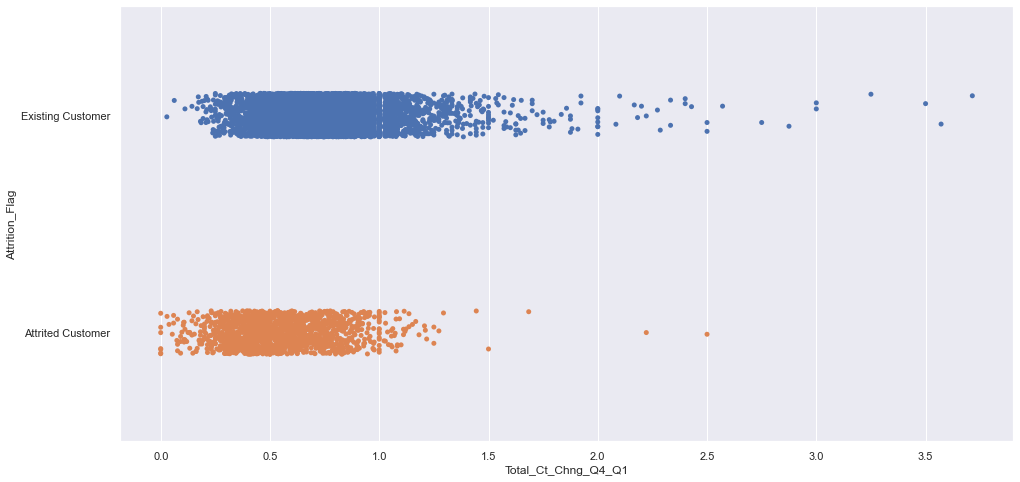

In [ ]:
# Attrition_Flag vs Total_Ct_Chng_Q4_Q1
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Total_Ct_Chng_Q4_Q1', y = 'Attrition_Flag', data = data)

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Attrition_Flag'>

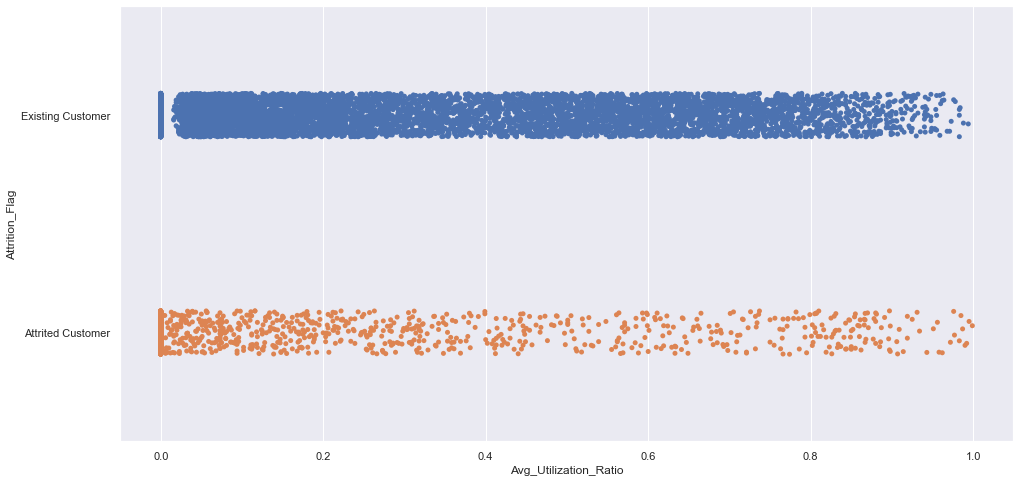

In [ ]:
# Attrition_Flag vs Avg_Utilization_Ratio
f = plt.figure(figsize=(16, 8))
sb.stripplot(x = 'Avg_Utilization_Ratio', y = 'Attrition_Flag', data = data)

<AxesSubplot:xlabel='Education_Level', ylabel='Attrition_Flag'>

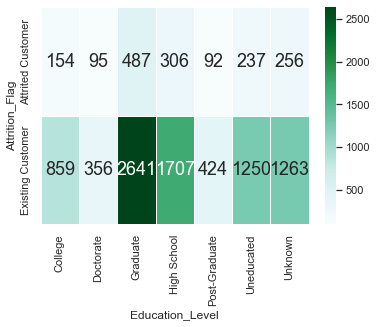

In [ ]:
# Attrition_Flag vs Education_Level
f = plt.figure(figsize=(6, 4))
sb.heatmap(data.groupby(['Attrition_Flag', 'Education_Level']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Marital_Status', ylabel='Attrition_Flag'>

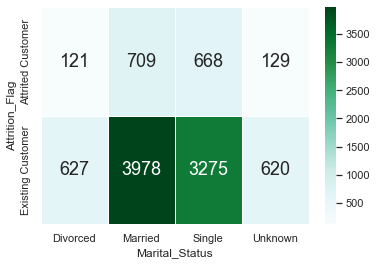

In [ ]:
# Attrition_Flag vs Marital_Status
f = plt.figure(figsize=(6, 4))
sb.heatmap(data.groupby(['Attrition_Flag', 'Marital_Status']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Gender', ylabel='Attrition_Flag'>

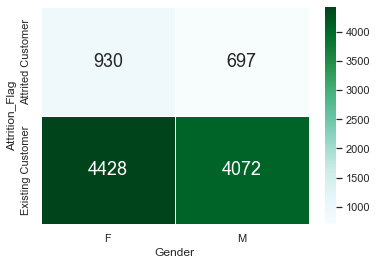

In [ ]:
# Attrition_Flag vs Gender
f = plt.figure(figsize=(6, 4))
sb.heatmap(data.groupby(['Attrition_Flag', 'Gender']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Income_Category', ylabel='Attrition_Flag'>

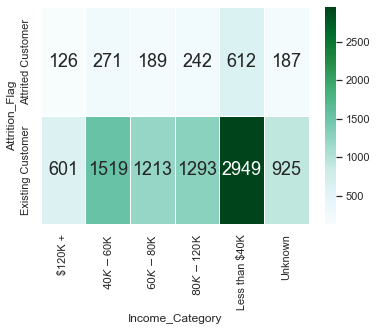

In [ ]:
# Attrition_Flag vs Income_Category
f = plt.figure(figsize=(6, 4))
sb.heatmap(data.groupby(['Attrition_Flag', 'Income_Category']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

<AxesSubplot:xlabel='Card_Category', ylabel='Attrition_Flag'>

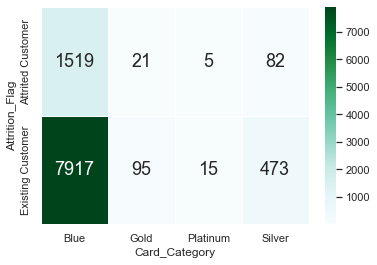

In [ ]:
# Attrition_Flag vs Card_Category
f = plt.figure(figsize=(6, 4))
sb.heatmap(data.groupby(['Attrition_Flag', 'Card_Category']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

## Visualise Data

> Numeric Data

In [ ]:
data["Card_Category"].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [ ]:
numeric_cols = data.columns[(data.dtypes == 'int64')|(data.dtypes == "float64")]
numeric_cols

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

Number of unique values in Months_Inactive_12_mon : 7


<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Income_Category'>

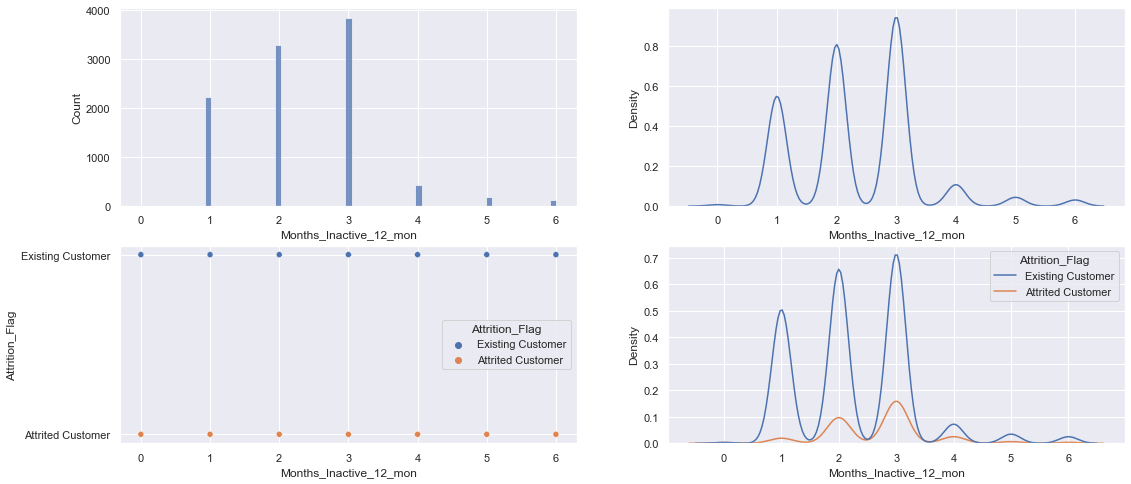

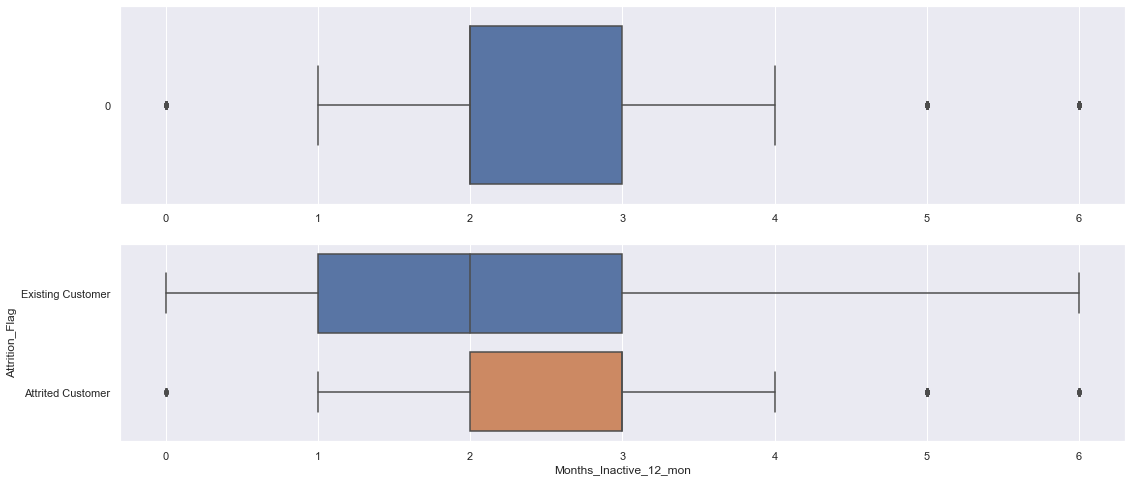

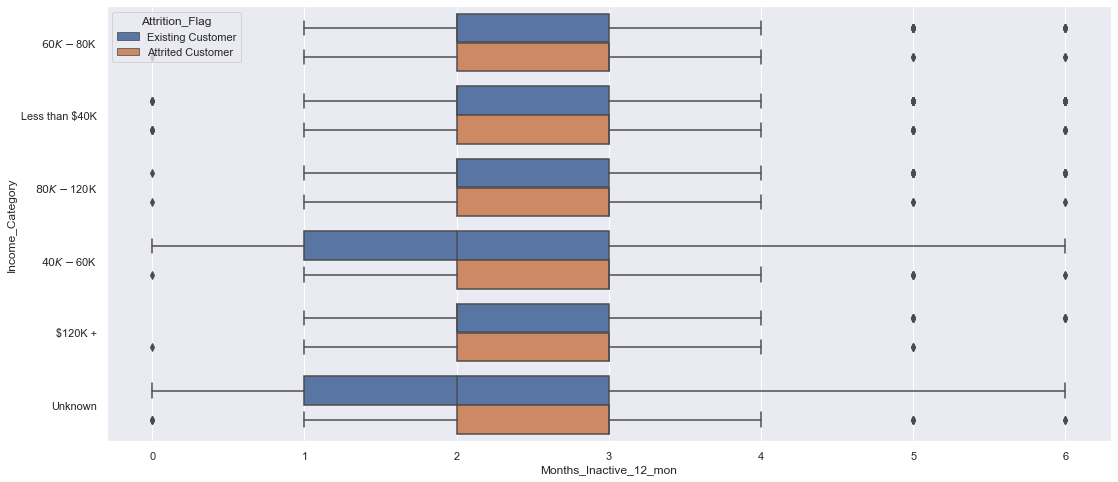

In [ ]:
variable = "Months_Inactive_12_mon"
print("Number of unique values in",variable, ":", len(data[variable].unique()))

f1, axes = plt.subplots(2, 2, figsize=(18, 8))
sb.histplot(data = data[variable], ax = axes[0,0])
sb.kdeplot(data[variable],ax = axes[0,1])
sb.scatterplot(data=data, y="Attrition_Flag", x=variable, hue="Attrition_Flag",ax = axes[1,0])
sb.kdeplot(data=data, x=variable, hue="Attrition_Flag",ax=axes[1,1])

f2, axes = plt.subplots(2, figsize=(18, 8))
sb.boxplot(data = data[variable], orient = "h",ax=axes[0])
sb.boxplot(x =variable, y = 'Attrition_Flag', data = data,ax = axes[1])

f3,axes = plt.subplots(1, figsize=(18, 8))
sb.boxplot(x =variable, y = "Income_Category", hue = 'Attrition_Flag' , data = data)

In [ ]:
data["Total_Revolving_Bal"].value_counts()

0       2470
2517     508
1965      12
1480      12
1434      11
        ... 
2467       1
2131       1
2400       1
2144       1
2241       1
Name: Total_Revolving_Bal, Length: 1974, dtype: int64

<AxesSubplot:xlabel='Total_Revolving_Bal', ylabel='Income_Category'>

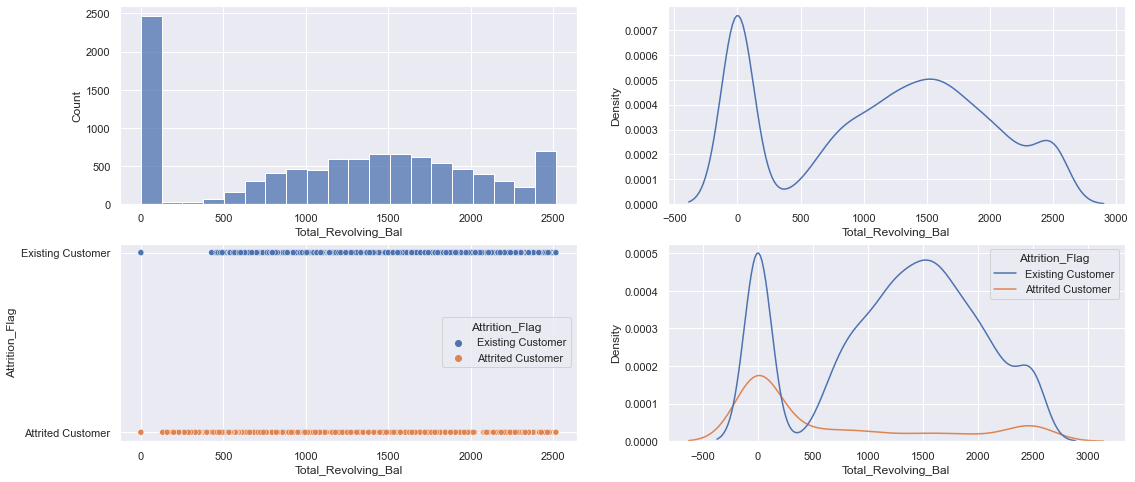

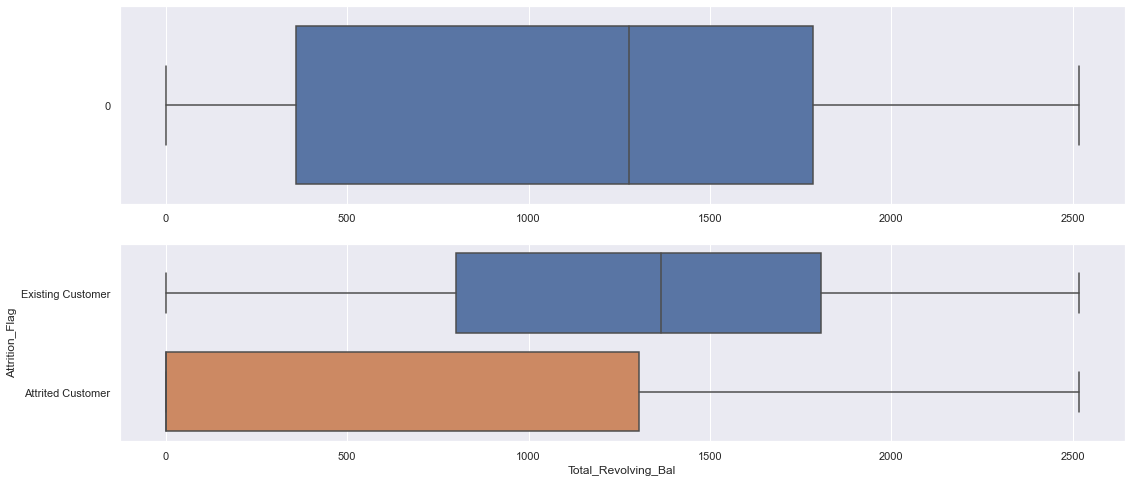

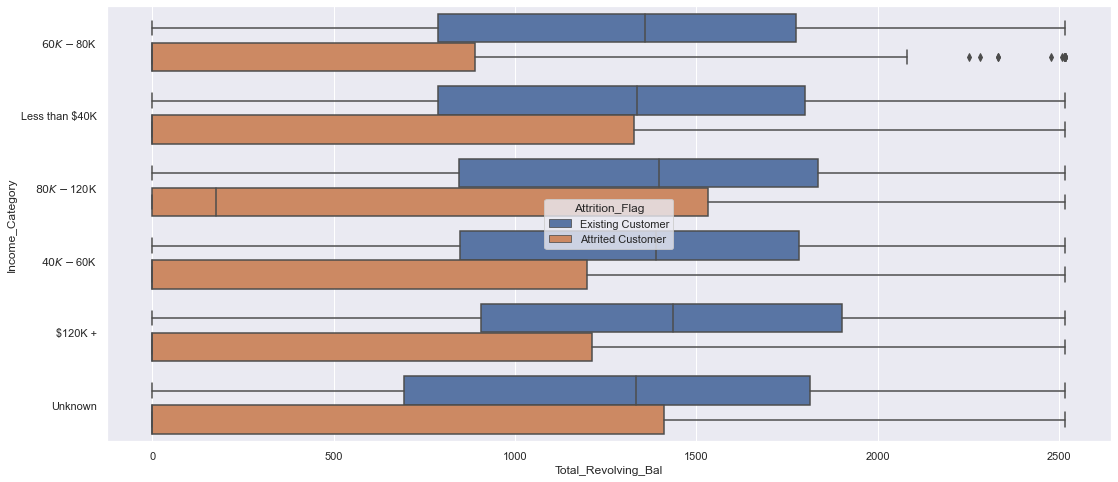

In [ ]:
f1, axes = plt.subplots(2, 2, figsize=(18, 8))
sb.histplot(data = data["Total_Revolving_Bal"], ax = axes[0,0])
sb.kdeplot(data["Total_Revolving_Bal"],ax = axes[0,1])
sb.scatterplot(data=data, y="Attrition_Flag", x= "Total_Revolving_Bal", hue="Attrition_Flag",ax = axes[1,0])
sb.kdeplot(data=data, x= "Total_Revolving_Bal", hue="Attrition_Flag",ax=axes[1,1])

f2, axes = plt.subplots(2, figsize=(18, 8))
sb.boxplot(data = data["Total_Revolving_Bal"], orient = "h",ax=axes[0])
sb.boxplot(x = "Total_Revolving_Bal", y = 'Attrition_Flag', data = data,ax = axes[1])

f3,axes = plt.subplots(1, figsize=(18, 8))
sb.boxplot(x = "Total_Revolving_Bal", y = "Income_Category", hue = 'Attrition_Flag' , data = data)

In [ ]:
data["Total_Trans_Amt"].value_counts()

4253     11
4509     11
4518     10
2229     10
4220      9
         ..
1274      1
4521      1
3231      1
4394      1
10294     1
Name: Total_Trans_Amt, Length: 5033, dtype: int64

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Income_Category'>

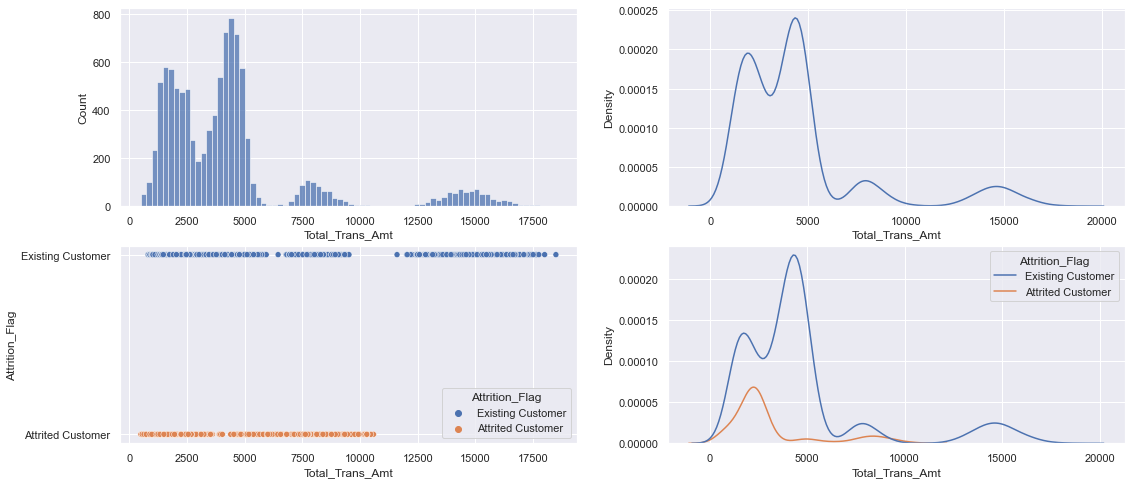

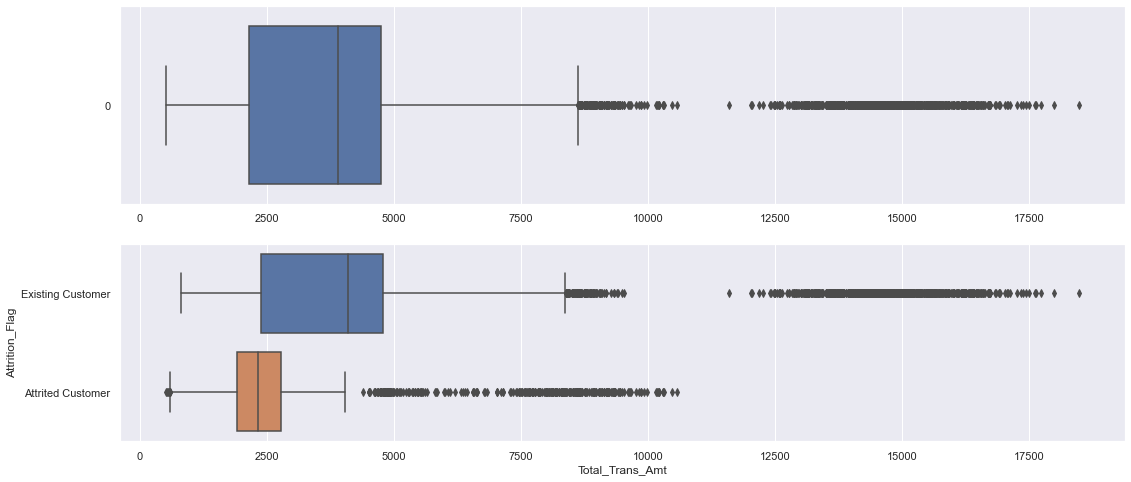

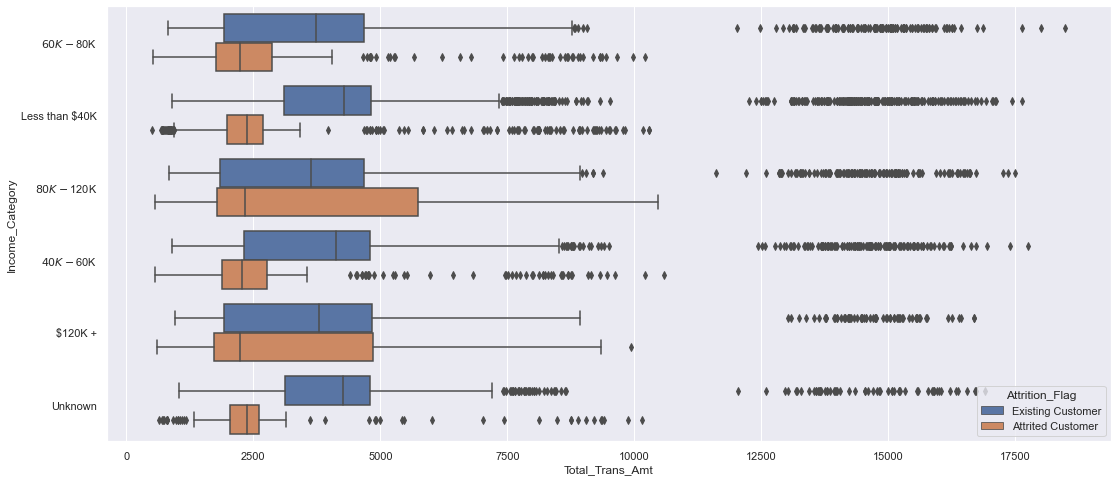

In [ ]:
f1, axes = plt.subplots(2, 2, figsize=(18, 8))
sb.histplot(data = data["Total_Trans_Amt"], ax = axes[0,0])
sb.kdeplot(data["Total_Trans_Amt"],ax = axes[0,1])
sb.scatterplot(data=data, y="Attrition_Flag", x= "Total_Trans_Amt", hue="Attrition_Flag",ax = axes[1,0])
sb.kdeplot(data=data, x= "Total_Trans_Amt", hue="Attrition_Flag",ax=axes[1,1])

f2, axes = plt.subplots(2, figsize=(18, 8))
sb.boxplot(data = data["Total_Trans_Amt"], orient = "h",ax=axes[0])
sb.boxplot(x = "Total_Trans_Amt", y = 'Attrition_Flag', data = data,ax = axes[1])

f3,axes = plt.subplots(1, figsize=(18, 8))
sb.boxplot(x = "Total_Trans_Amt", y = "Income_Category", hue = 'Attrition_Flag' , data = data)

In [ ]:
data["Credit_Limit"].value_counts()

34516.0    508
1438.3     507
9959.0      18
15987.0     18
23981.0     12
          ... 
9183.0       1
29923.0      1
9551.0       1
11558.0      1
10388.0      1
Name: Credit_Limit, Length: 6205, dtype: int64

<AxesSubplot:xlabel='Credit_Limit', ylabel='Income_Category'>

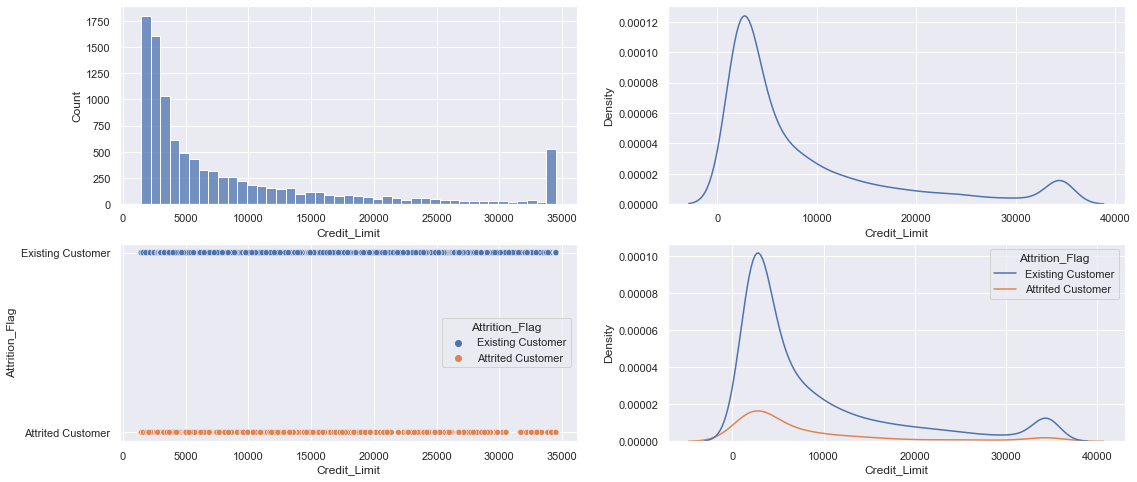

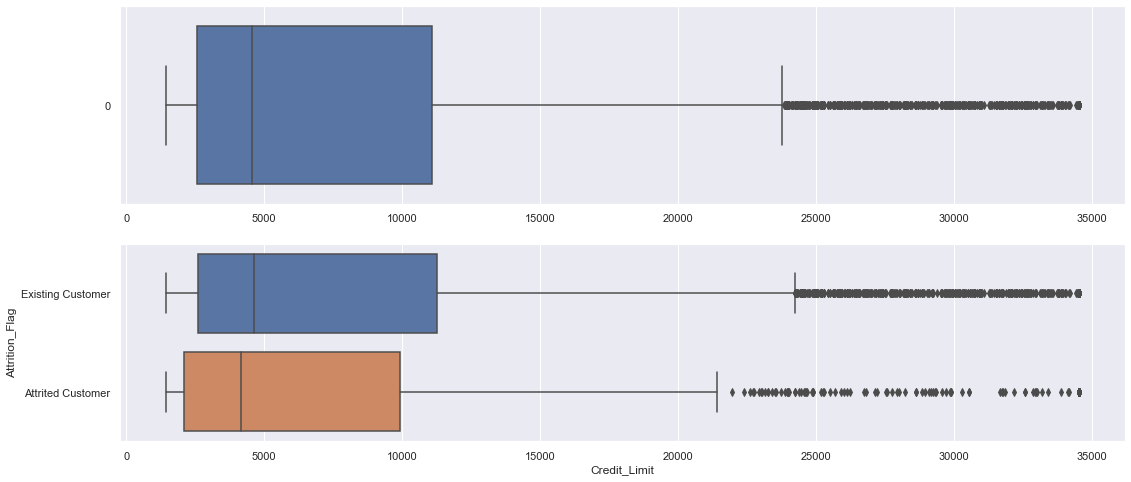

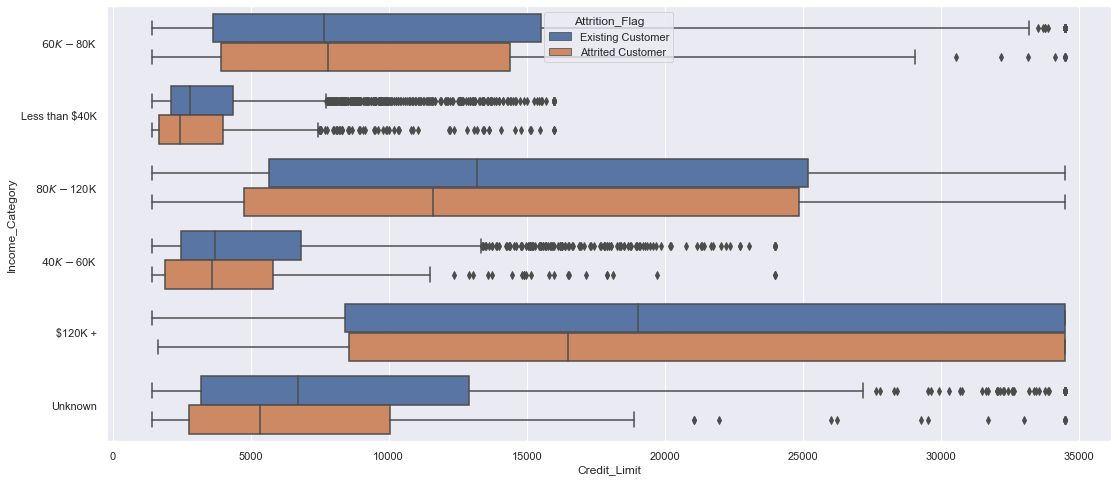

In [ ]:
f1, axes = plt.subplots(2, 2, figsize=(18, 8))
sb.histplot(data = data["Credit_Limit"], ax = axes[0,0])
sb.kdeplot(data["Credit_Limit"],ax = axes[0,1])
sb.scatterplot(data=data, y="Attrition_Flag", x= "Credit_Limit", hue="Attrition_Flag",ax = axes[1,0])
sb.kdeplot(data=data, x= "Credit_Limit", hue="Attrition_Flag",ax=axes[1,1])

f2, axes = plt.subplots(2, figsize=(18, 8))
sb.boxplot(data = data["Credit_Limit"], orient = "h",ax=axes[0])
sb.boxplot(x = "Credit_Limit", y = 'Attrition_Flag', data = data,ax = axes[1])

f3,axes = plt.subplots(1, figsize=(18, 8))
sb.boxplot(x = "Credit_Limit", y = "Income_Category", hue = 'Attrition_Flag' , data = data)

In [ ]:
data["Avg_Utilization_Ratio"].value_counts()

0.000    2470
0.073      44
0.057      33
0.048      32
0.060      30
         ... 
0.927       1
0.935       1
0.954       1
0.385       1
0.009       1
Name: Avg_Utilization_Ratio, Length: 964, dtype: int64

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Income_Category'>

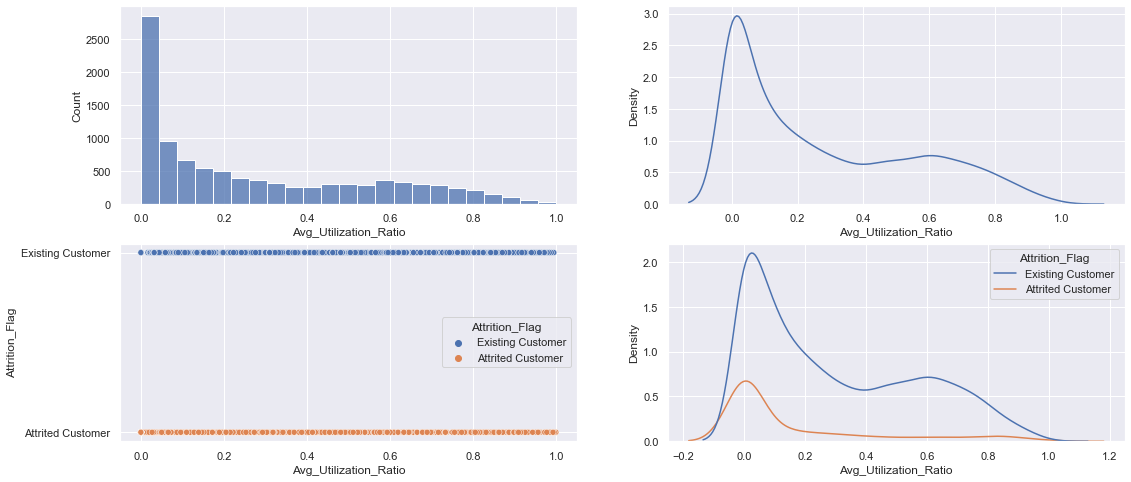

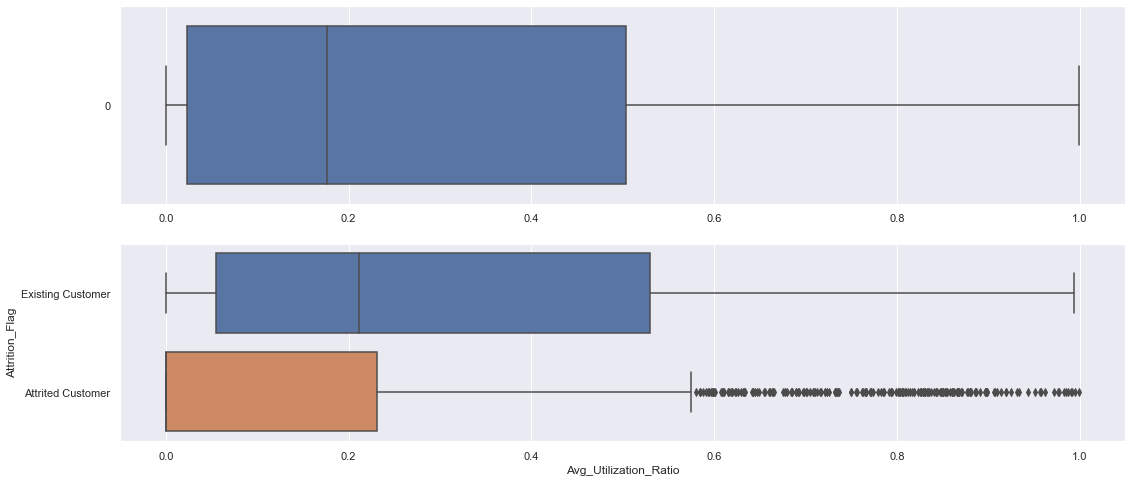

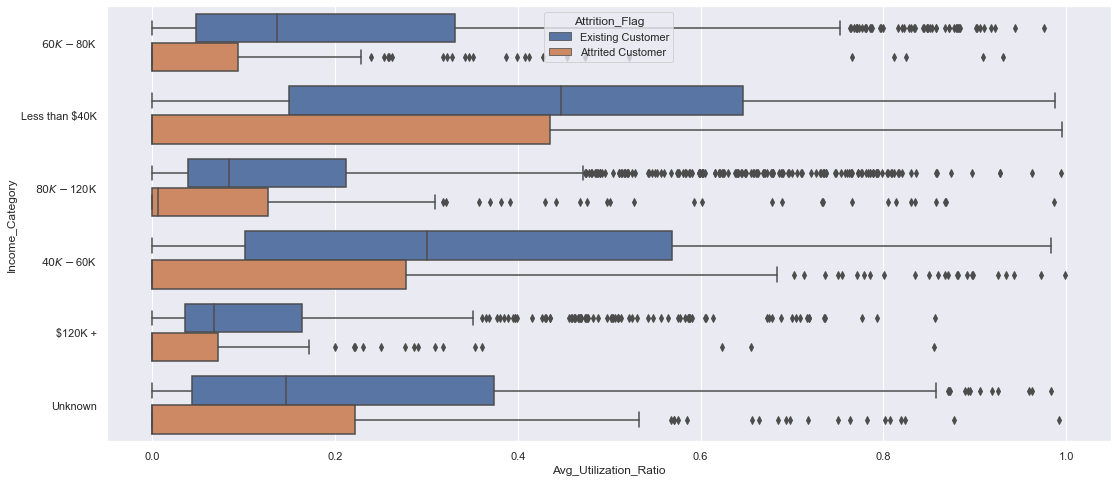

In [ ]:
f1, axes = plt.subplots(2, 2, figsize=(18, 8))
sb.histplot(data = data["Avg_Utilization_Ratio"], ax = axes[0,0])
sb.kdeplot(data["Avg_Utilization_Ratio"],ax = axes[0,1])
sb.scatterplot(data=data, y="Attrition_Flag", x= "Avg_Utilization_Ratio", hue="Attrition_Flag",ax = axes[1,0])
sb.kdeplot(data=data, x= "Avg_Utilization_Ratio", hue="Attrition_Flag",ax=axes[1,1])

f2, axes = plt.subplots(2, figsize=(18, 8))
sb.boxplot(data = data["Avg_Utilization_Ratio"], orient = "h",ax=axes[0])
sb.boxplot(x = "Avg_Utilization_Ratio", y = 'Attrition_Flag', data = data,ax = axes[1])

f3,axes = plt.subplots(1, figsize=(18, 8))
sb.boxplot(x = "Avg_Utilization_Ratio", y = "Income_Category", hue = 'Attrition_Flag' , data = data)

Number of unique values in Customer_Age : 45


<AxesSubplot:xlabel='Customer_Age', ylabel='Card_Category'>

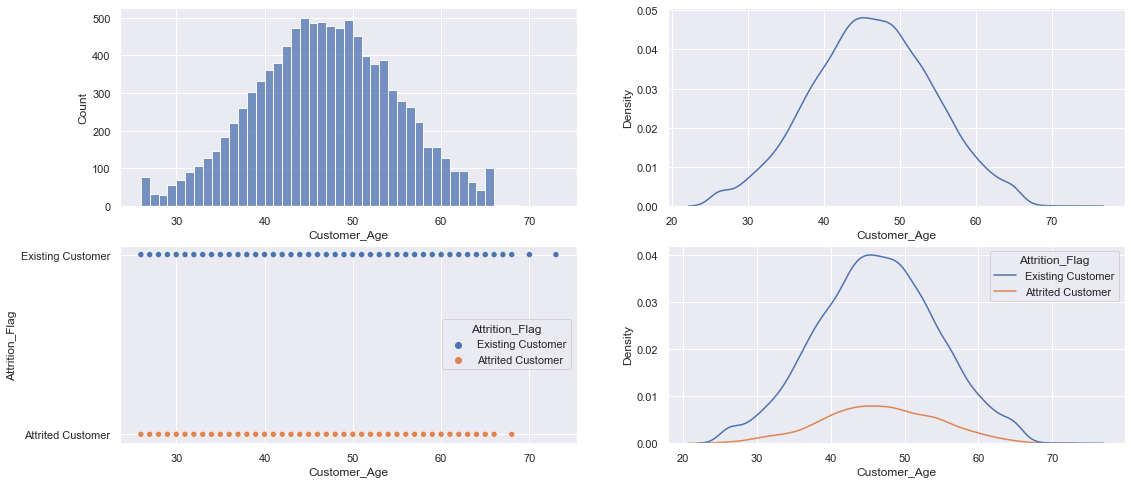

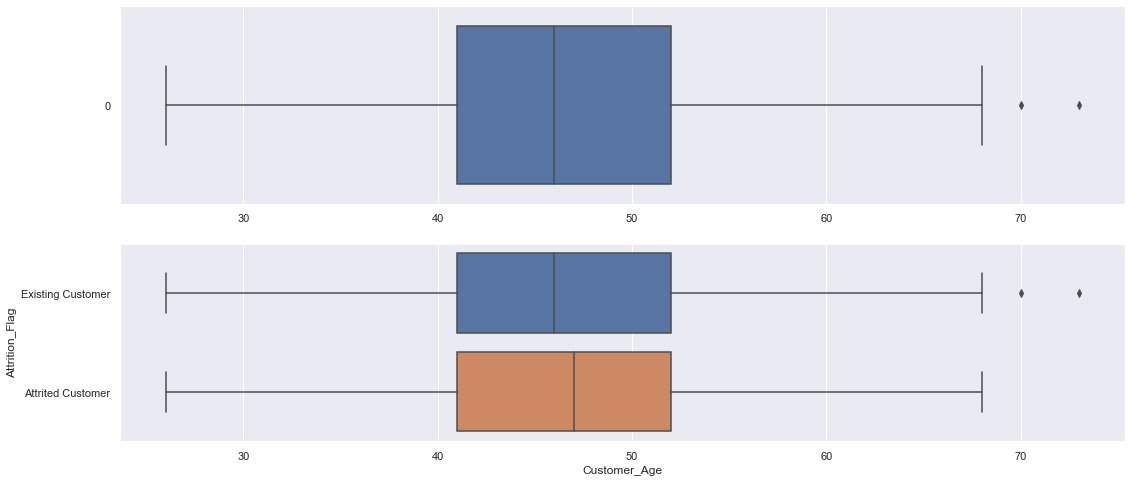

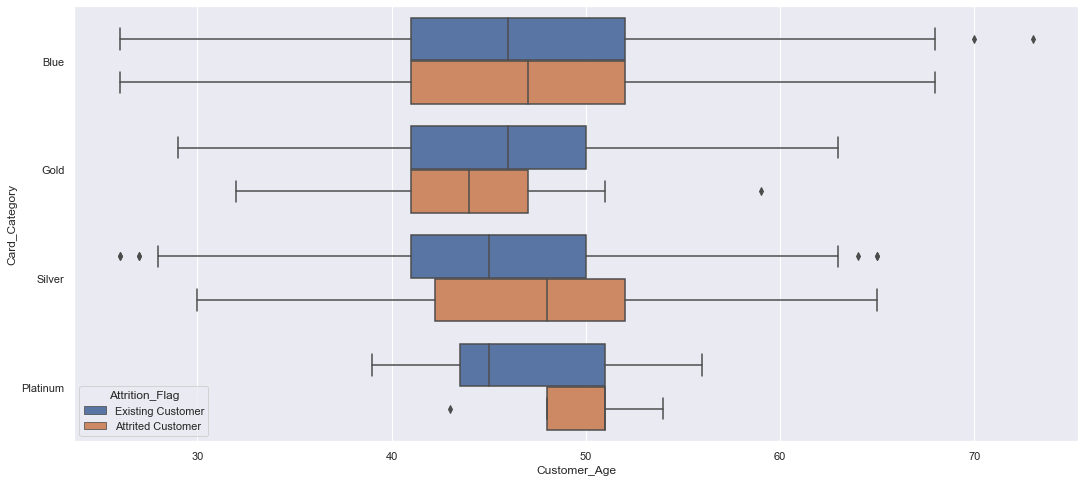

In [ ]:
variable = "Customer_Age"
print("Number of unique values in",variable, ":", len(data[variable].unique()))
#print(data[variable].value_counts())

f1, axes = plt.subplots(2, 2, figsize=(18, 8))
sb.histplot(data = data[variable], ax = axes[0,0])
sb.kdeplot(data[variable],ax = axes[0,1])
sb.scatterplot(data=data, y="Attrition_Flag", x=variable, hue="Attrition_Flag",ax = axes[1,0])
sb.kdeplot(data=data, x=variable, hue="Attrition_Flag",ax=axes[1,1])

f2, axes = plt.subplots(2, figsize=(18, 8))
sb.boxplot(data = data[variable], orient = "h",ax=axes[0])
sb.boxplot(x =variable, y = 'Attrition_Flag', data = data,ax = axes[1])

f3,axes = plt.subplots(1, figsize=(18, 8))
sb.boxplot(x =variable, y = "Card_Category", hue = 'Attrition_Flag' , data = data)

Number of unique values in Dependent_count : 6
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64


<AxesSubplot:xlabel='Dependent_count', ylabel='Card_Category'>

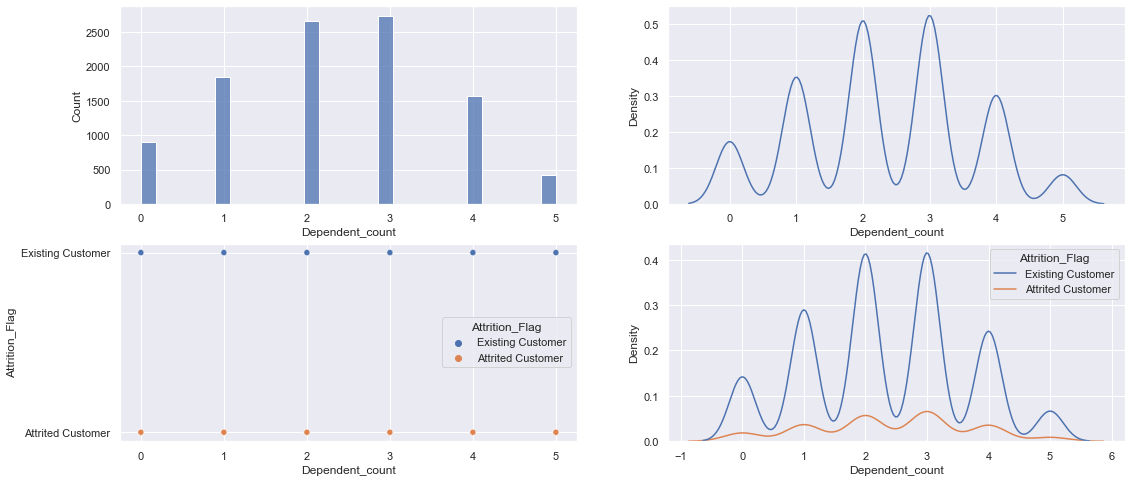

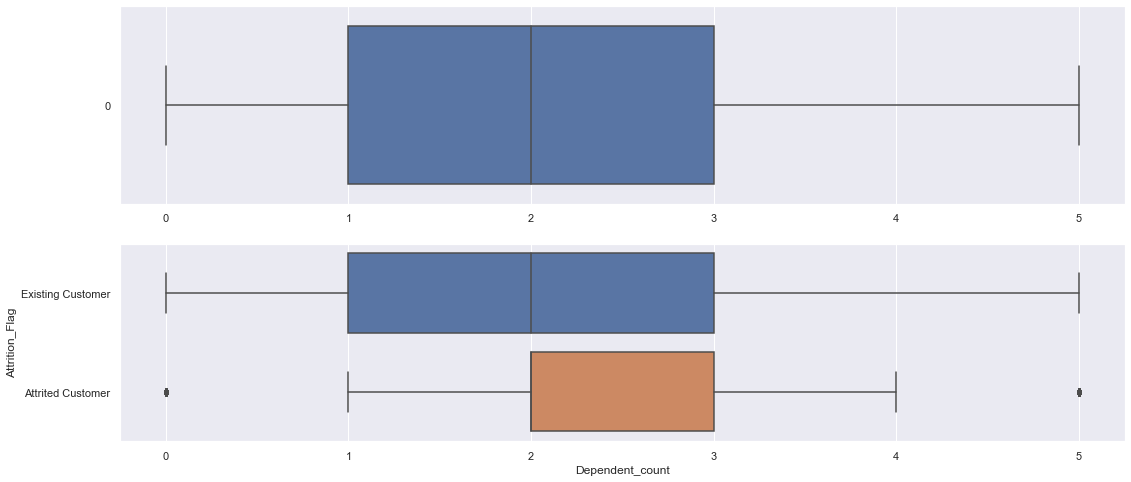

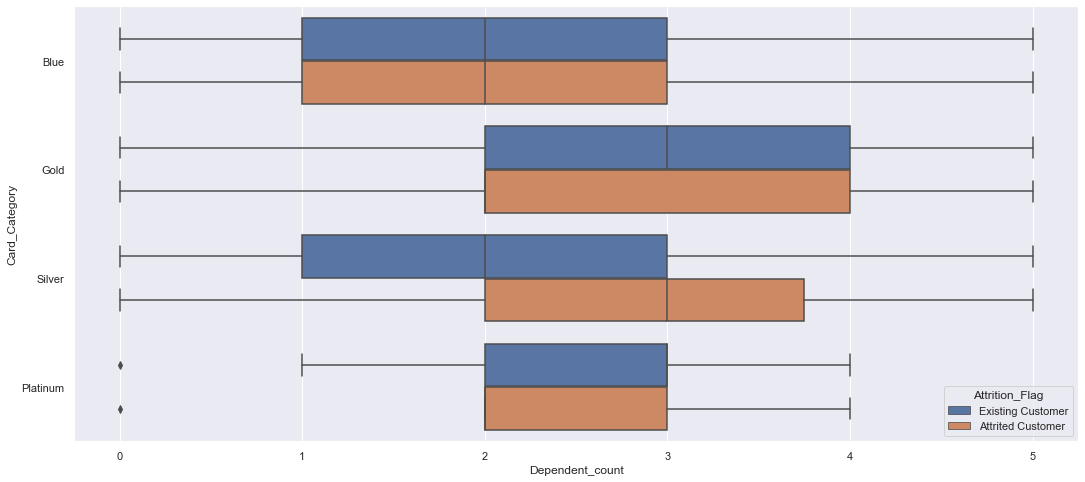

In [ ]:
variable = 'Dependent_count'
print("Number of unique values in",variable, ":", len(data[variable].unique()))
print(data[variable].value_counts())

f1, axes = plt.subplots(2, 2, figsize=(18, 8))
sb.histplot(data = data[variable], ax = axes[0,0])
sb.kdeplot(data[variable],ax = axes[0,1])
sb.scatterplot(data=data, y="Attrition_Flag", x=variable, hue="Attrition_Flag",ax = axes[1,0])
sb.kdeplot(data=data, x=variable, hue="Attrition_Flag",ax=axes[1,1])

f2, axes = plt.subplots(2, figsize=(18, 8))
sb.boxplot(data = data[variable], orient = "h",ax=axes[0])
sb.boxplot(x =variable, y = 'Attrition_Flag', data = data,ax = axes[1])


f3,axes = plt.subplots(1, figsize=(18, 8))
sb.boxplot(x =variable, y = "Card_Category", hue = 'Attrition_Flag' , data = data)

Number of unique values in Months_on_book : 44


<AxesSubplot:xlabel='Months_on_book', ylabel='Card_Category'>

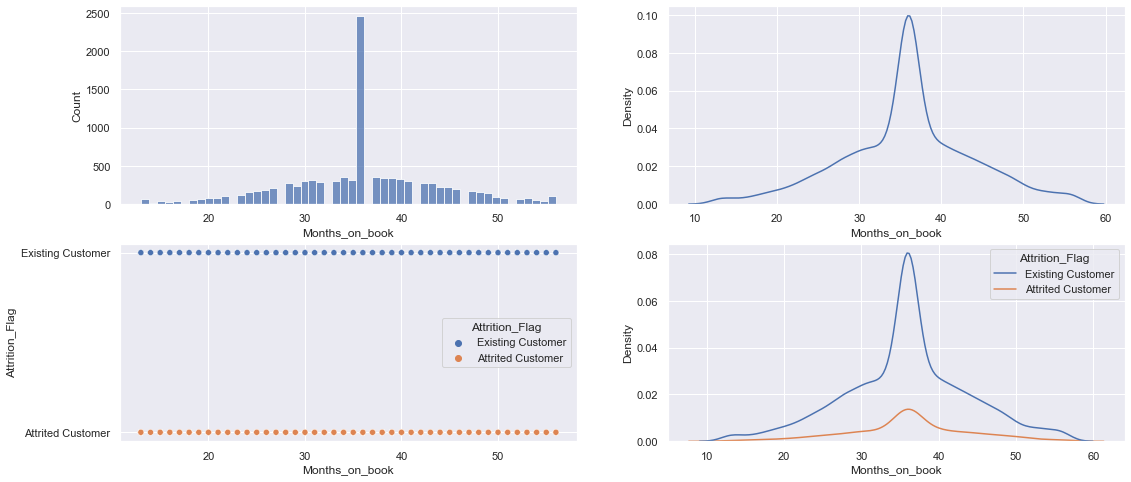

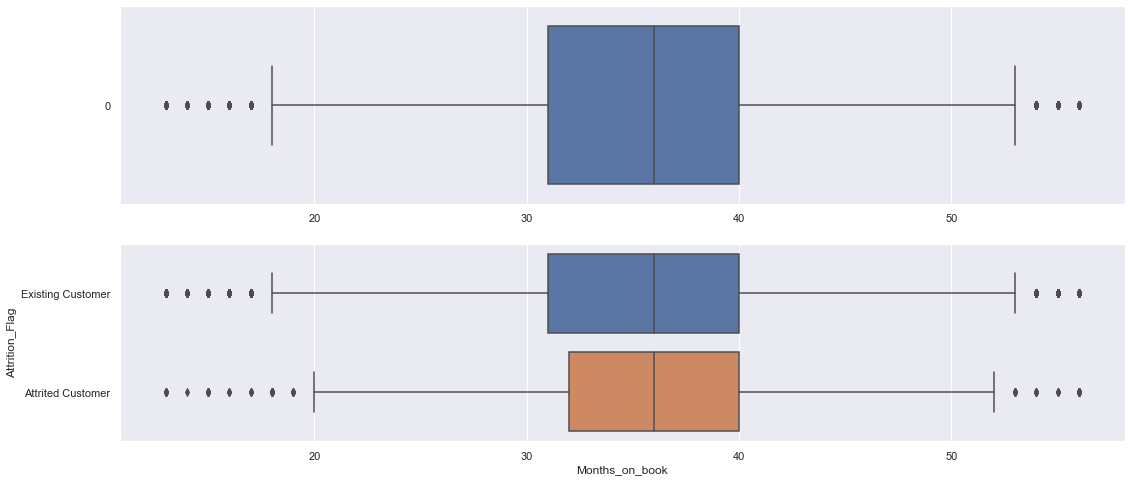

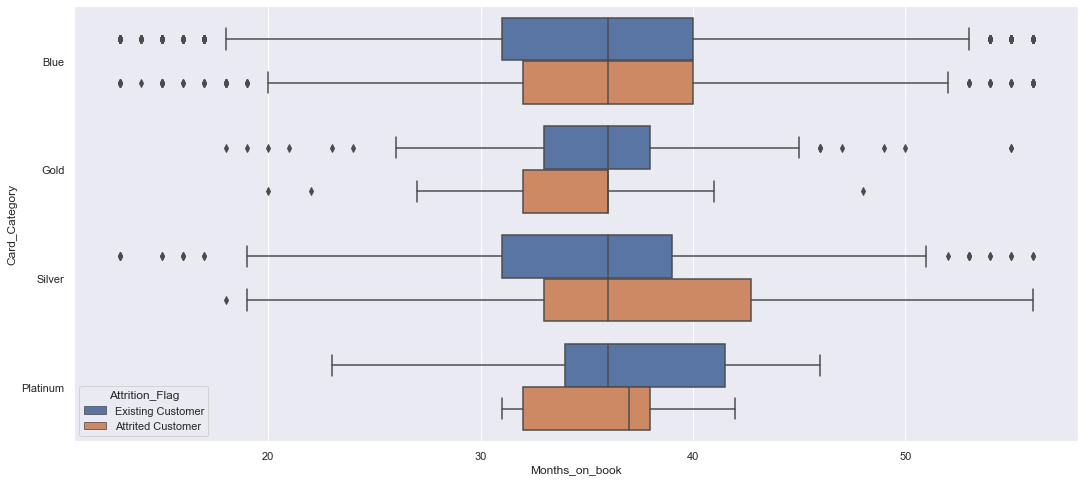

In [ ]:
variable = "Months_on_book"
print("Number of unique values in",variable, ":", len(data[variable].unique()))
#print(data[variable].value_counts())

f1, axes = plt.subplots(2, 2, figsize=(18, 8))
sb.histplot(data = data[variable], ax = axes[0,0])
sb.kdeplot(data[variable],ax = axes[0,1])
sb.scatterplot(data=data, y="Attrition_Flag", x=variable, hue="Attrition_Flag",ax = axes[1,0])
sb.kdeplot(data=data, x=variable, hue="Attrition_Flag",ax=axes[1,1])

f2, axes = plt.subplots(2, figsize=(18, 8))
sb.boxplot(data = data[variable], orient = "h",ax=axes[0])
sb.boxplot(x =variable, y = 'Attrition_Flag', data = data,ax = axes[1])

f3,axes = plt.subplots(1, figsize=(18, 8))
sb.boxplot(x =variable, y = "Card_Category", hue = 'Attrition_Flag' , data = data)

Number of unique values in Total_Relationship_Count : 6
3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64


<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='Card_Category'>

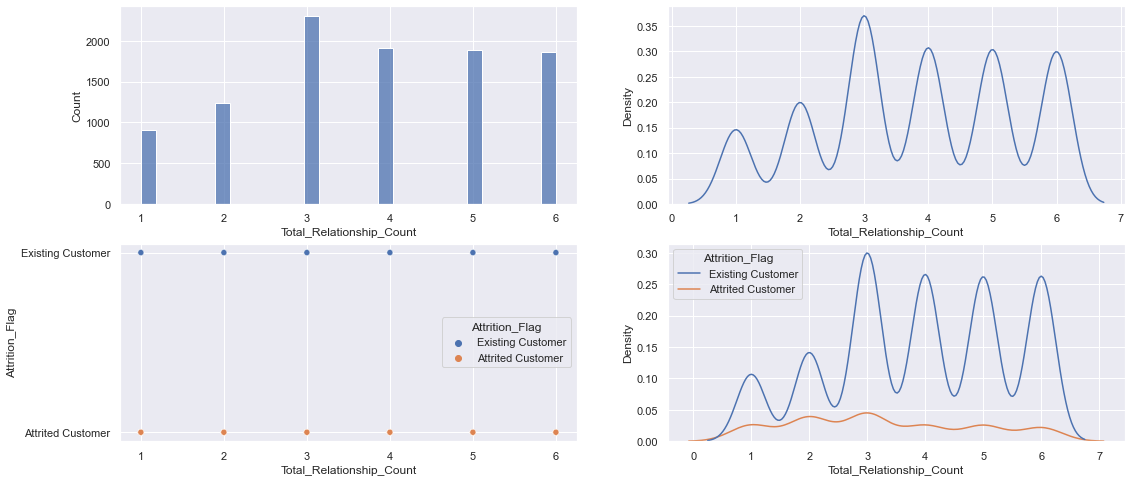

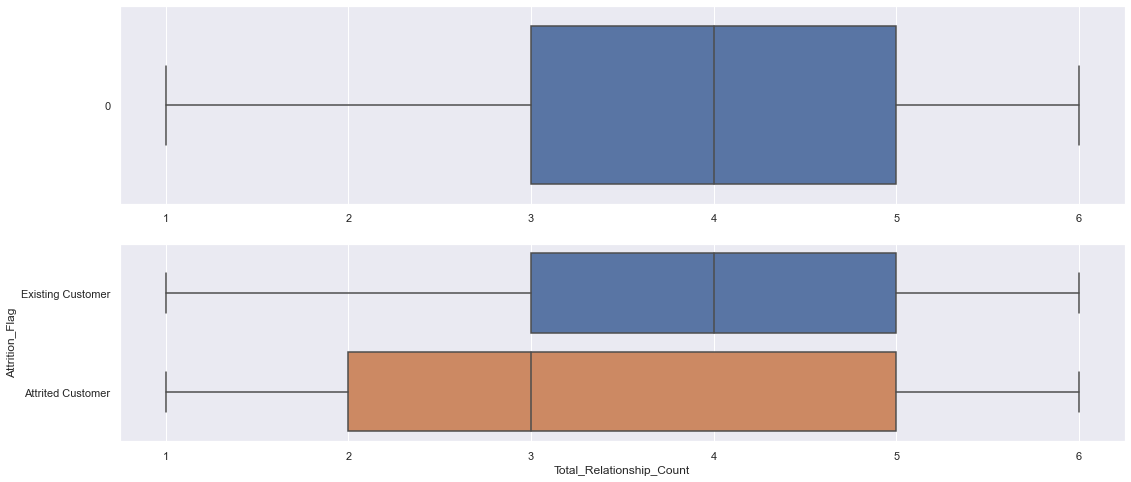

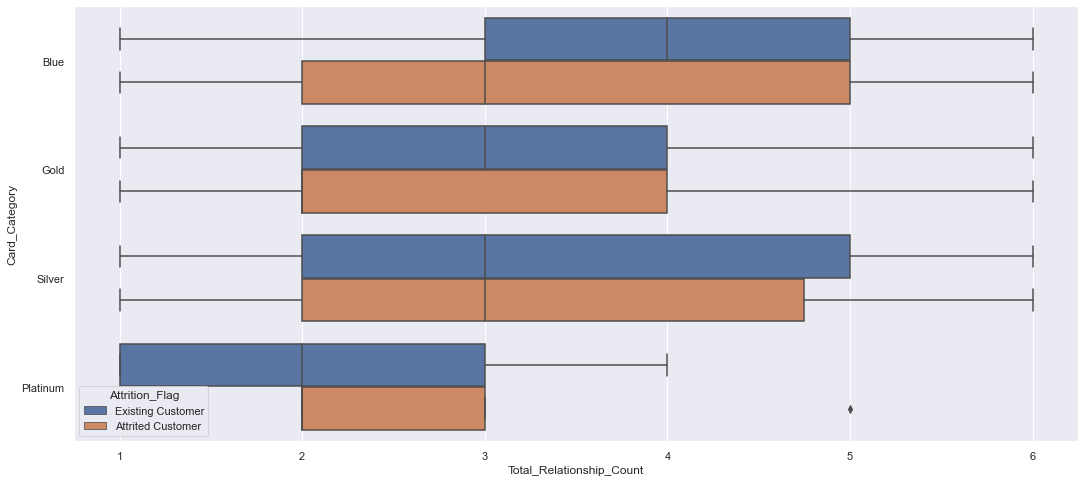

In [ ]:
variable = "Total_Relationship_Count"
print("Number of unique values in",variable, ":", len(data[variable].unique()))
print(data[variable].value_counts())

f1, axes = plt.subplots(2, 2, figsize=(18, 8))
sb.histplot(data = data[variable], ax = axes[0,0])
sb.kdeplot(data[variable],ax = axes[0,1])
sb.scatterplot(data=data, y="Attrition_Flag", x=variable, hue="Attrition_Flag",ax = axes[1,0])
sb.kdeplot(data=data, x=variable, hue="Attrition_Flag",ax=axes[1,1])

f2, axes = plt.subplots(2, figsize=(18, 8))
sb.boxplot(data = data[variable], orient = "h",ax=axes[0])
sb.boxplot(x =variable, y = 'Attrition_Flag', data = data,ax = axes[1])

f3,axes = plt.subplots(1, figsize=(18, 8))
sb.boxplot(x =variable, y = "Card_Category", hue = 'Attrition_Flag' , data = data)

                          CLIENTNUM  Customer_Age  Dependent_count  \
CLIENTNUM                  1.000000      0.007613         0.006772   
Customer_Age               0.007613      1.000000        -0.122254   
Dependent_count            0.006772     -0.122254         1.000000   
Months_on_book             0.134588      0.788912        -0.103062   
Total_Relationship_Count   0.006907     -0.010931        -0.039076   
Months_Inactive_12_mon     0.005729      0.054361        -0.010768   
Contacts_Count_12_mon      0.005694     -0.018452        -0.040505   
Credit_Limit               0.005708      0.002476         0.068065   
Total_Revolving_Bal        0.000825      0.014780        -0.002688   
Avg_Open_To_Buy            0.005633      0.001151         0.068291   
Total_Amt_Chng_Q4_Q1       0.017369     -0.062042        -0.035439   
Total_Trans_Amt           -0.019692     -0.046446         0.025046   
Total_Trans_Ct            -0.002961     -0.067097         0.049912   
Total_Ct_Chng_Q4_Q1 

<AxesSubplot:>

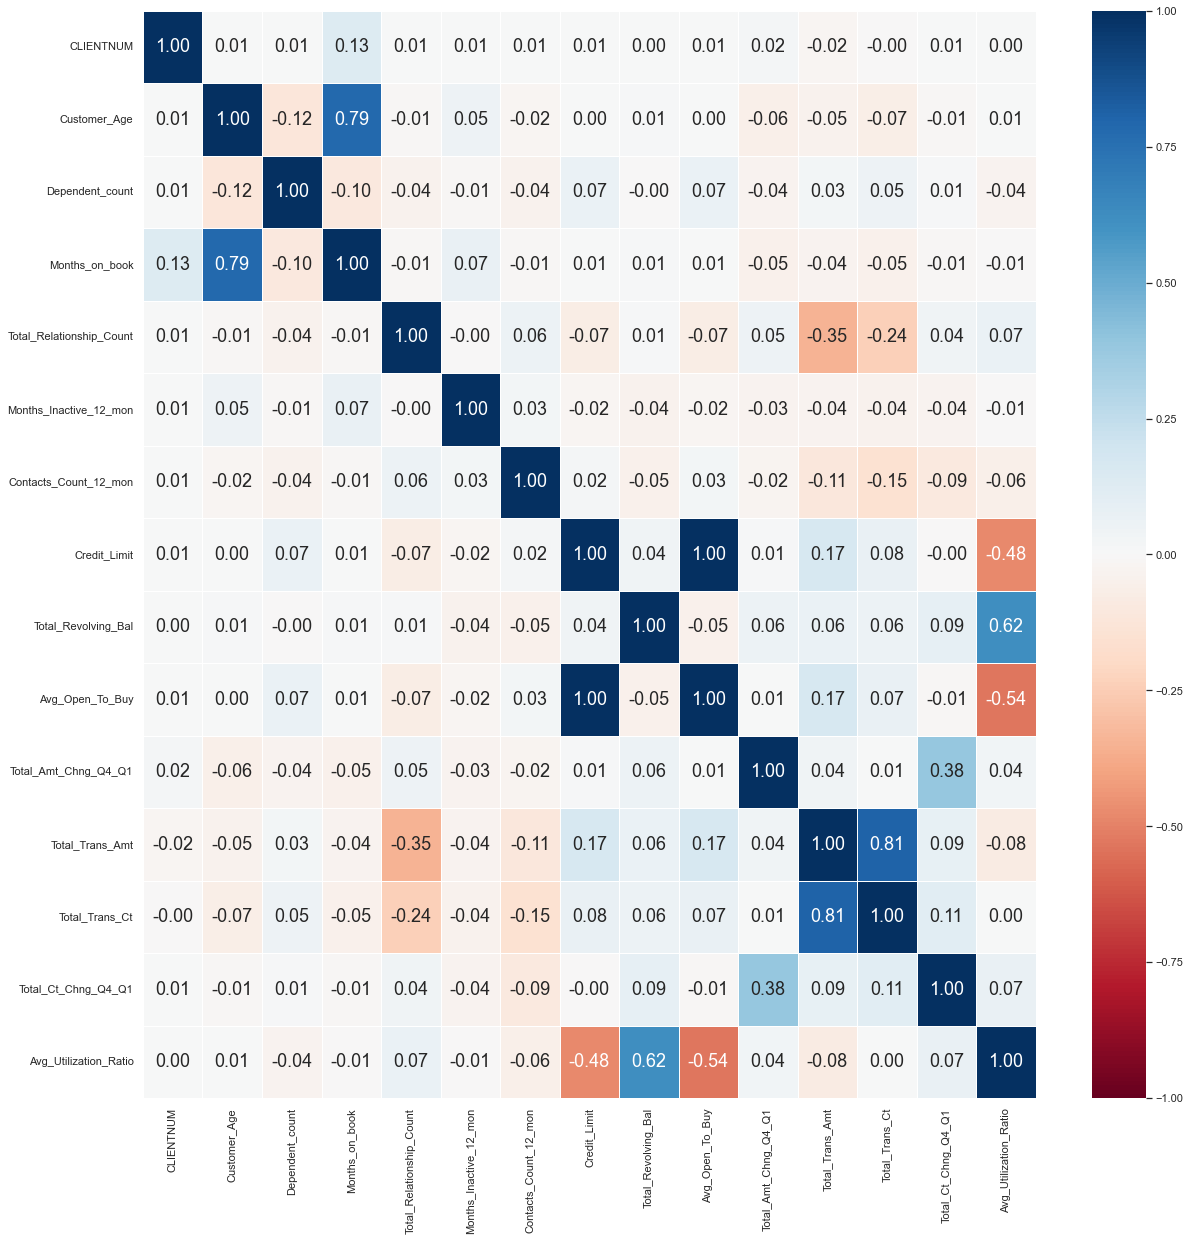

In [ ]:
#Correlation matrix
print(data.corr())

#Heatmap of Correlation matrix
f = plt.figure(figsize = (20,20))
sb.heatmap(data.corr(), vmin = -1, vmax = 1, linewidths = 1,
          annot = True, fmt = ".2f", annot_kws = {"size":18}, cmap = "RdBu")